# Chapter 3
In this chapter we take a closer look at neuroelectro data, and we also look at the quality of chapter 1 optimizer fits from this perspective

In [chapter 4](chapter4.ipynb) (a closely related notebook see hyperlink) We will take a closer using Docker environments to access commonly used simulator backends NEURON/PyNN/Allen Glif/Brian and waveform feature extraction tools: EFEL, Allen etc.

In [1]:
from neuronunit.optimisation.optimization_management import data_versus_optimal

consider installing pynn a heavier backend
glif python Error


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot([0],[1])
plt.show()
import warnings
warnings.filterwarnings("ignore")

import pickle
import os
result_RAW = pickle.load(open('RAWall_data_tests.p','rb'))
result_ADEXP = pickle.load(open('ADEXPall_data_tests.p','rb'))
result_RAW = result_RAW['RAW']


In [3]:
#type(result_ADEXP['ADEXP']['olf'][0])
ad_olf_dtc = result_ADEXP['ADEXP']['olf'][0].dtc
ad_purkine_dtc = result_ADEXP['ADEXP']['purkine'][0].dtc
ad_ca1pyr_dtc = result_ADEXP['ADEXP']['ca1pyr'][0].dtc
ad_ca1basket_dtc = result_ADEXP['ADEXP']['ca1basket'][0].dtc
ad_neo_dtc = result_ADEXP['ADEXP']['neo'][0].dtc

In [4]:
#type(result_ADEXP['ADEXP']['olf'][0])
olf_dtc = result_RAW['olf'][0]
purkine_dtc = result_RAW['purkine'][0]
ca1pyr_dtc = result_RAW['ca1pyr'][0]
ca1basket_dtc = result_RAW['ca1basket'][0]
neo_dtc = result_RAW['neo'][0]


RAW_dtc = {}
ADEXP_dtc = {}
#type(result_ADEXP['ADEXP']['olf'][0])
RAW_dtc = {}
RAW_dtc['Cerebellum Purkinje cell'] = result_RAW['purkine']
RAW_dtc['Olfactory bulb (main) mitral cell'] = result_RAW['olf']
RAW_dtc['Hippocampus CA1 pyramidal cell'] = result_RAW['ca1pyr']
RAW_dtc['Neocortex pyramidal cell layer 5-6'] = result_RAW['neo']
RAW_dtc['Hippocampus CA1 basket cell'] = result_RAW['ca1basket']

ADEXP_dtc = {}
ADEXP_dtc['Cerebellum Purkinje cell'] = [d.dtc for d in result_ADEXP['ADEXP']['purkine']]
ADEXP_dtc['Olfactory bulb (main) mitral cell'] = [d.dtc for d in result_ADEXP['ADEXP']['olf']]
ADEXP_dtc['Hippocampus CA1 pyramidal cell'] = [d.dtc for d in result_ADEXP['ADEXP']['ca1pyr']]
ADEXP_dtc['Neocortex pyramidal cell layer 5-6'] = [d.dtc for d in result_ADEXP['ADEXP']['neo']]
ADEXP_dtc['Hippocampus CA1 basket cell'] = [d.dtc for d in result_ADEXP['ADEXP']['ca1basket']]





In [5]:
rts,complete_map = pickle.load(open('../tests/russell_tests.p','rb'))


In [6]:
import matplotlib
matplotlib.use('Agg')
import seaborn as sns
import urllib.request, json
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os


import pandas

try:
    ne_raw = pandas.read_csv('article_ephys_metadata_curated.csv', delimiter='\t')
except:
    !wget https://neuroelectro.org/static/src/article_ephys_metadata_curated.csv
    ne_raw = pandas.read_csv('article_ephys_metadata_curated.csv', delimiter='\t')

hip = ne_raw[ne_raw['NeuronName'].str.match('Hippocampus CA1 pyramidal cell')]
here = ne_raw[ne_raw['TableID']==18]

from scipy.signal import find_peaks_cwt


from neuronunit import tests as _, neuroelectro
from neuronunit.tests import passive, waveform, fi
from neuronunit.tests.fi import RheobaseTestP
from neuronunit.tests import passive, waveform#, druckmann2013
import sciunit
from neuronunit.tests import bi_modal_test as bmt
import quantities as pq
import seaborn

try:
    with open('specific_test_data.p','rb') as f:
        contents = pickle.load(f)
        cell_name_map = contents[1]
        neuron_values = contents[0]
except:
    neuron_values, cell_name_map = bmt.specific_properties(name_map,test_map)
    with open('specific_test_data.p','wb') as f:
        pickle.dump(f,[neuron_values, cell_name_map])

test_map = {1:'CapacitanceTest',2:'InputResistanceTest',3:'RestingPotentialTest',4:'TimeConstantTest',\
            5:'InjectedCurrentAPAmplitudeTest',6:'InjectedCurrentAPWidthTest',\
            7:'InjectedCurrentAPThresholdTest',8:'RheobaseTest'}

units_map = {1:pq.pF,2:pq.MOhm,3:pq.mV,4:pq.ms,\
            5:pq.mV,6:pq.ms,\
            7:pq.mV,8:pq.pA}

complete_map = {}
for k,v in units_map.items():
    complete_map[test_map[k]] = units_map[k]

name_map ={}
name_map["Cerebellum Purkinje cell"] = "sao471801888"
name_map["Dentate gyrus basket cell"] = "nlx_cell_100201"
name_map["Hippocampus CA1 basket cell"] = "nlx_cell_091205"
name_map["Neocortex pyramidal cell layer 5-6"] = "nifext_50"
name_map["Olfactory bulb (main) mitral cell"] = "nlx_anat_100201"
name_map["Hippocampus CA1 pyramidal cell"] = "sao830368389"
#ax = sns.violinplot(x="day", y="total_bill", data=tips)
inv_name_map = {v: k for k, v in name_map.items()}
executable_tests = {}
russell_tests = {}




## Below is instructions for making NU tests used in Chapter1.

``` python

for tt in test_classes:
    if test_map[i] in str(tt):

        ipe_tests_path = str(os.getcwd())+'/pipe_tests.p'
        assert os.path.isfile(pipe_tests_path) == True
        with open(pipe_tests_path,'rb') as f:
            pipe_tests = pickle.load(f)

        t = tt()
        t.observation = {}
        t.observation['mean'] = neuron_values[nlex_ids][i]['modes'][0]*units_map[i]
        t.observation['value'] = neuron_values[nlex_ids][i]['modes'][0]*units_map[i]
        t.observation['std'] = neuron_values[nlex_ids][i]['std']*units_map[i]
        t.observation['n'] = neuron_values[nlex_ids][i]['n']
        executable_tests[cell_name][test_map[i]] =  t
        print(test_map[i],t.name)

        assert test_map[i] == t.name
        executable_tests[cell_name][test_map[i]].data = None
        executable_tests[cell_name][test_map[i]].data = neuron_values[nlex_ids][i]['values']
```


# In the cells below we show experimental/model agreement
In terms of tests centered about modes of data distributions

In [7]:
# ADEXP_dtc
RAW_dtc['Cerebellum Purkinje cell'][0].tests['CapacitanceTest'].observation

{'value': array(613.684) * pF,
 'mean': array(613.684) * pF,
 'n': 111,
 'std': array(9205.26) * pF}

In [18]:
#import matplotlib.pyplot as plt
#%inline

%matplotlib inline
import matplotlib.pyplot as plt
# Make the figures big enough for the optically challenged.
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import pylab
import seaborn as sns


def plot_opt_vs_distribution(neuron_values,inv_name_map,executable_tests,pop_dtc):
    for nlex_ids,values in neuron_values.items():
        cell_name = inv_name_map[nlex_ids]

        executable_tests[cell_name] = {}#[test_map[i]]
        #russell_tests[cell_name] = {}
        for i in neuron_values[nlex_ids].keys():
            neuron_values[nlex_ids][i]['modes'] = []
            if test_map[i] in pop_dtc[cell_name][0].predictions.keys():
                temp = pop_dtc[cell_name][0].predictions[test_map[i]]
                takefirst = list(temp.keys())[0]
                opt_found = float(temp[takefirst].rescale(units_map[i]))
            else:
                continue
            if pop_dtc[cell_name][0].scores[test_map[i]]<0.90:
                data = sorted(neuron_values[nlex_ids][i]['values'])
                data = [ float(d*units_map[i]) for d in data ]
                #plt.clf()
                #fig, axes = plt.subplots(figsize=(10, 10),nrows=2, ncols=1, sharex=True, dpi=100)

                #fig, ax = plt.subplots(4,1)
                fig, ax = plt.subplots(figsize=(10, 10),nrows=4, ncols=1, sharex=True, dpi=100)

                ax[0].title.set_text('test name: '+str(test_map[i])+'Cell type: '+str(cell_name))
                ax[0] = sns.violinplot(data=data, palette="Set2", split=True,
                             scale="count", inner="stick",orient="h")
                ax[0].axvline(x=opt_found,linewidth=2, color='r',label='opt solution found')
                n, bins, patches = ax[1].hist(data, label=str(cell_name)+str(test_map[i]))
                half = (bins[1]-bins[0])/2.0

                mode0 = (bins[np.where(n==np.max(n))[0][0]]+half)*units_map[i]

                ax[0].axvline(x=mode0,linewidth=2, color='b',label='target that guides optimization')

        
                # the histogram of the data
                ax[1].axvline(x=opt_found,linewidth=2, color='r')

                ax[1].axvline(x=mode0,linewidth=2, color='b')
                ax[2].title.set_text('opt score: '+str(pop_dtc[cell_name][0].scores[test_map[i]]))


                ax[2].boxplot(data,vert=False)
                ax[2].axvline(x=opt_found,linewidth=2, color='r')
                ax[2].axvline(x=mode0,linewidth=2, color='b')

                plt.xlabel('units: '+str(units_map[i]))

                plt.ylabel('Expected value: ')#+str(units_map[i]))
                plt.legend()
                plt.show()

                mode0 = bins[np.where(n==np.max(n))[0][0]]+half
                neuron_values[nlex_ids][i]['modes'].append(mode0)



            try:

                mode1 = bins[np.where(n==sorted(n)[-2])[0][0]]
                neuron_values[nlex_ids][i]['modes'].append(mode1)

            except:
                pass


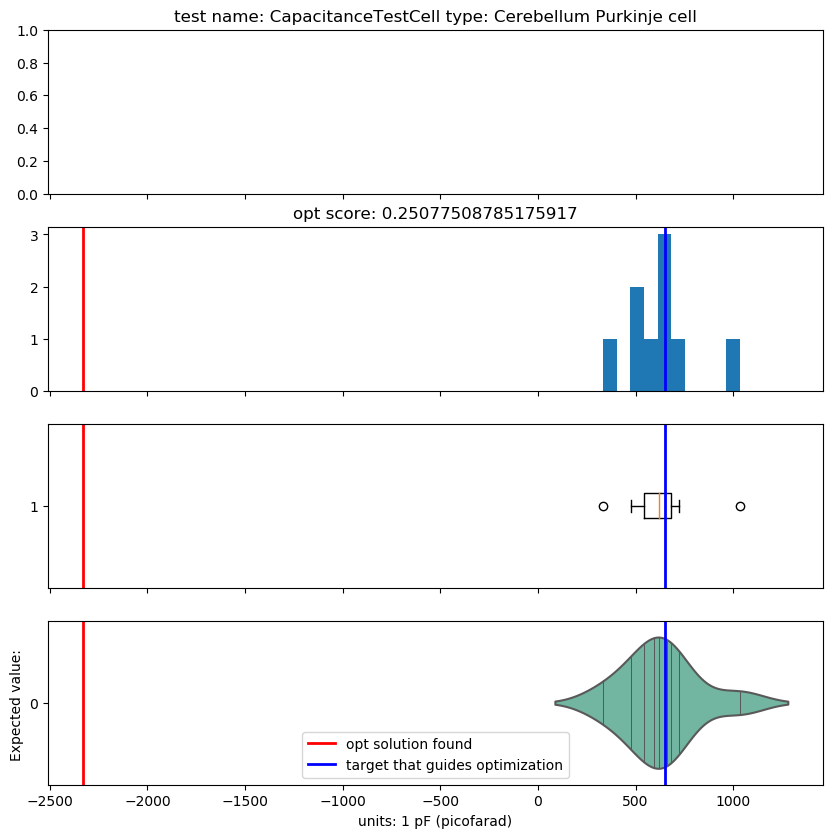

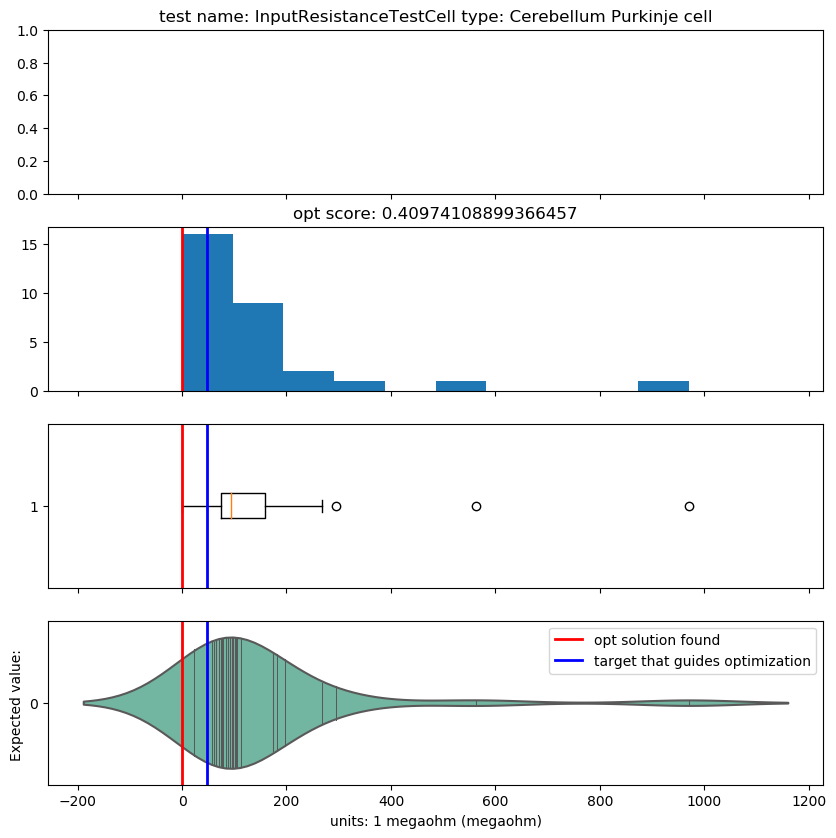

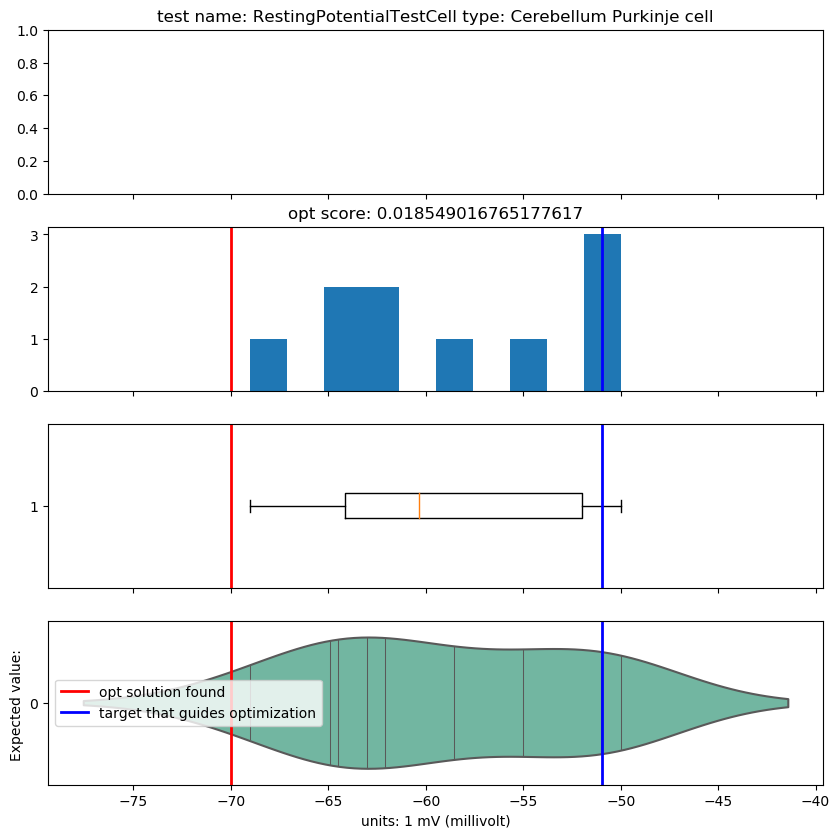

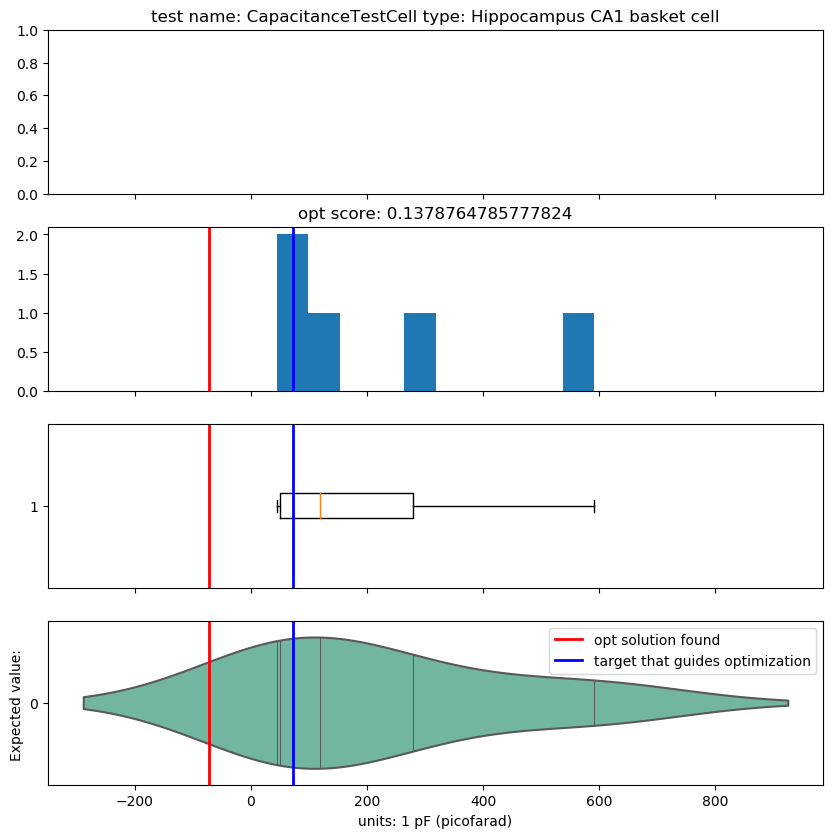

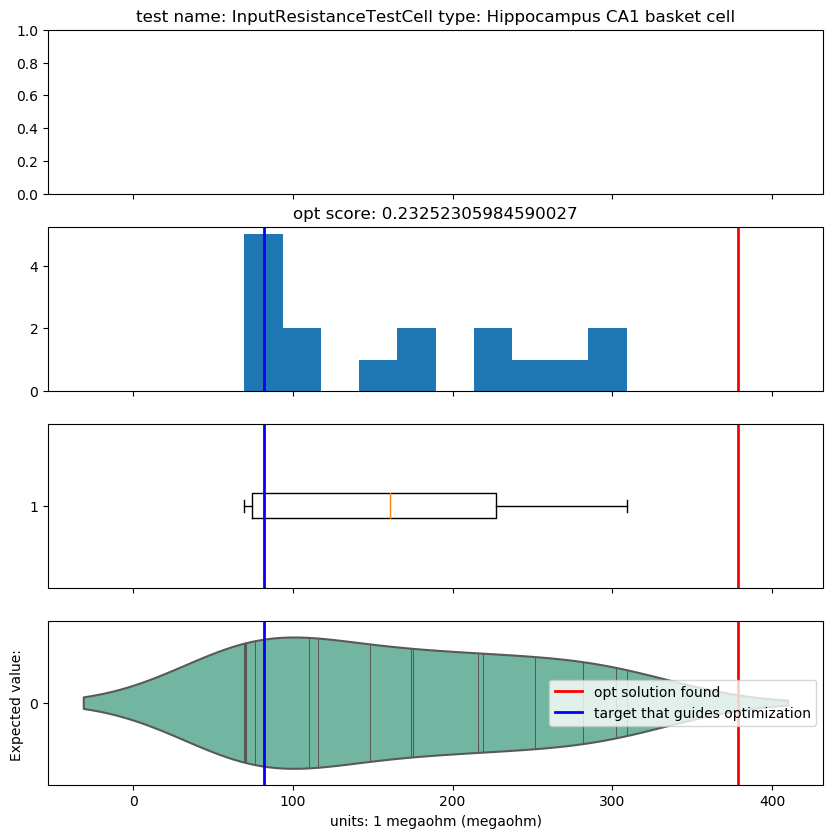

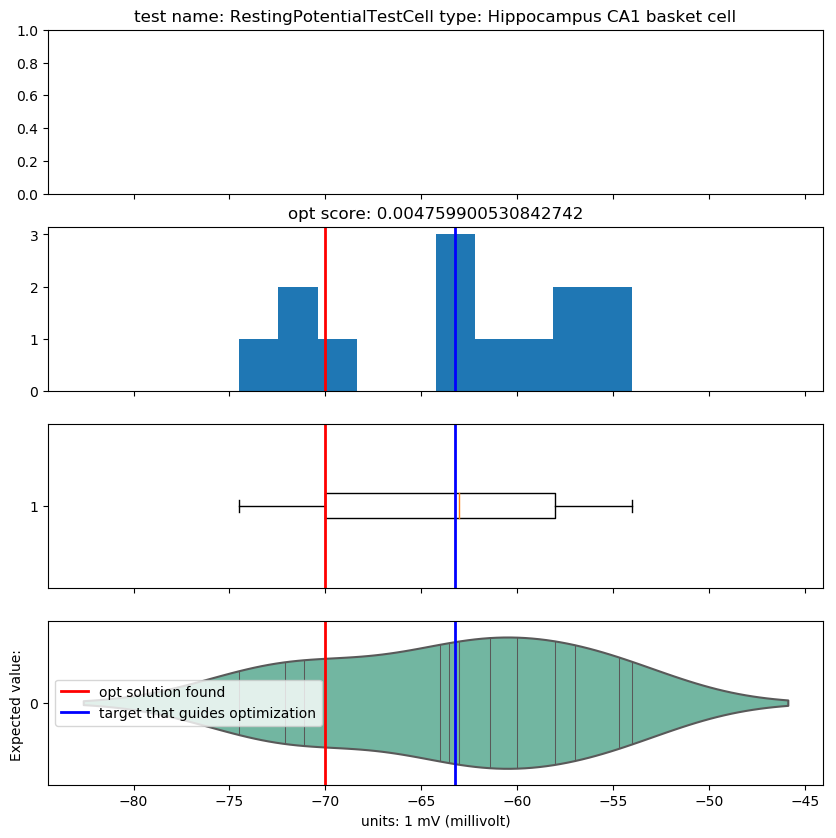

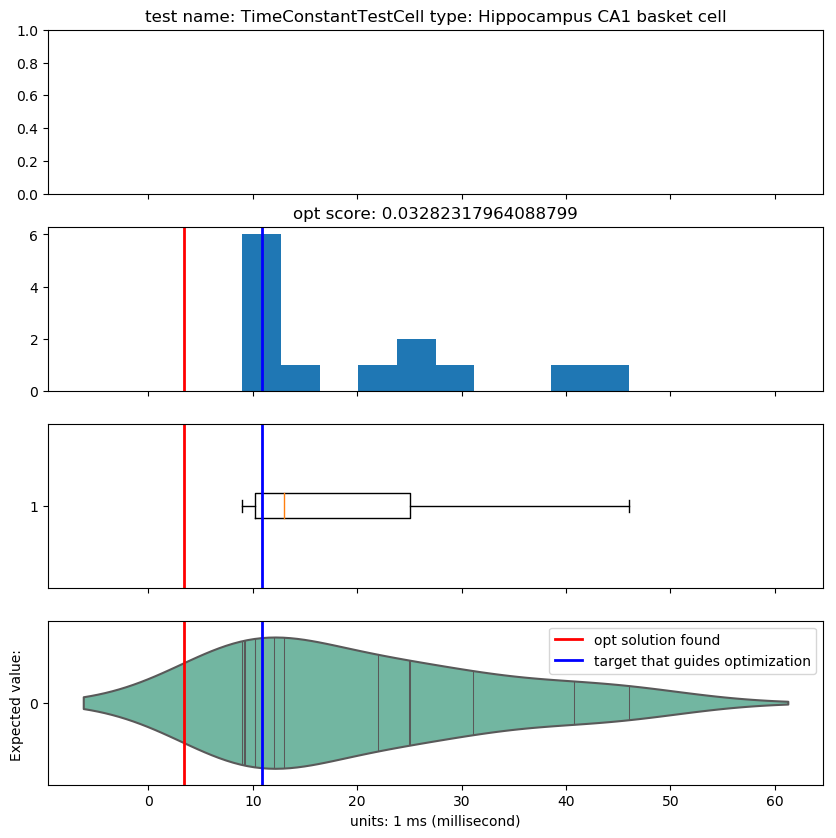

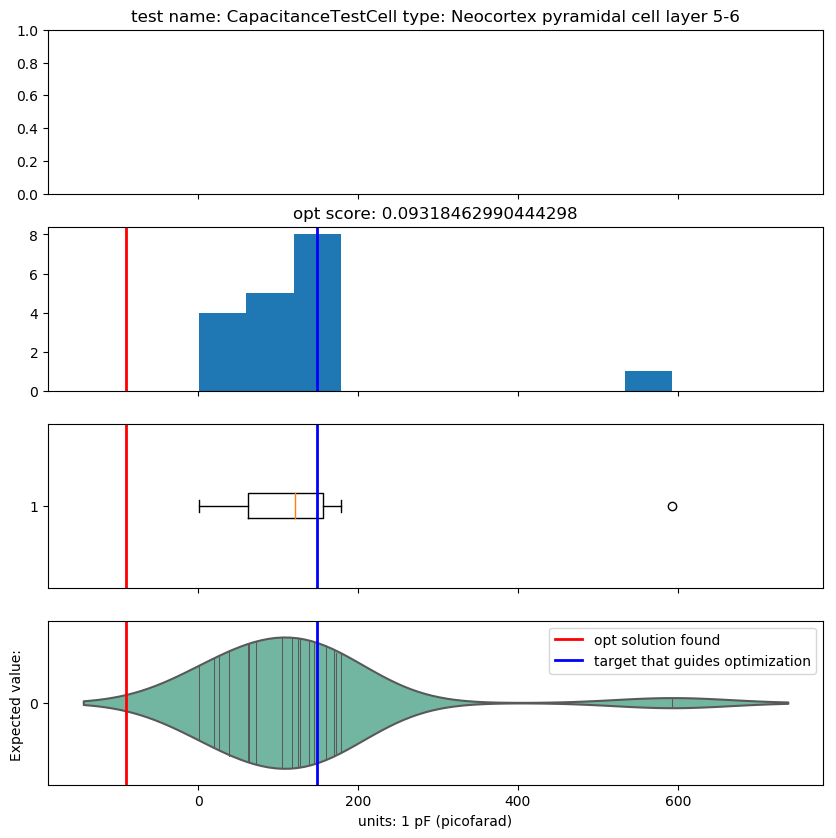

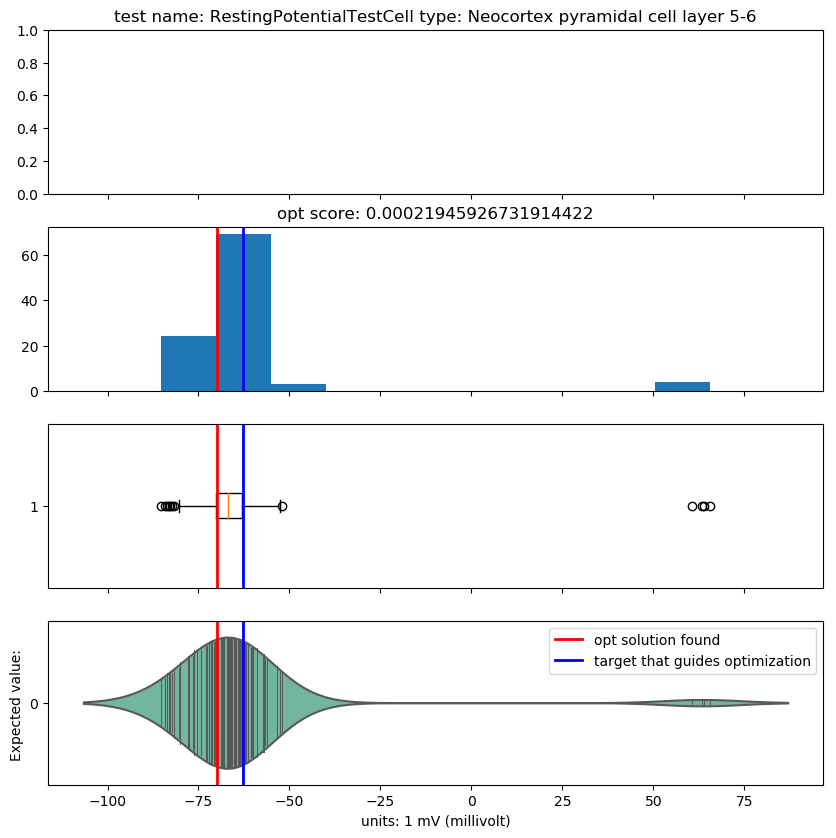

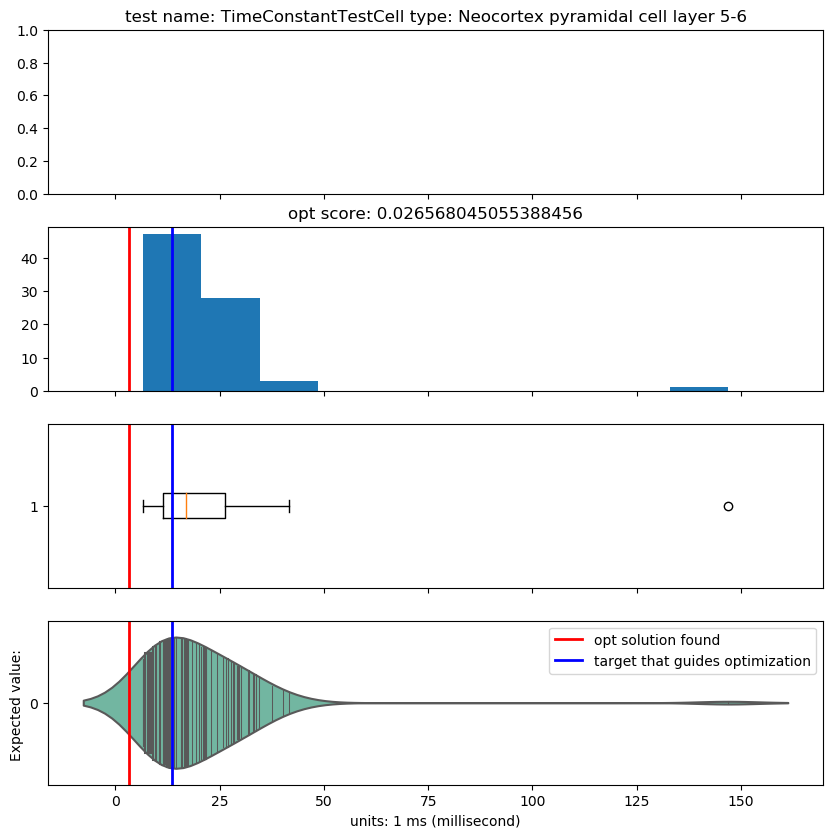

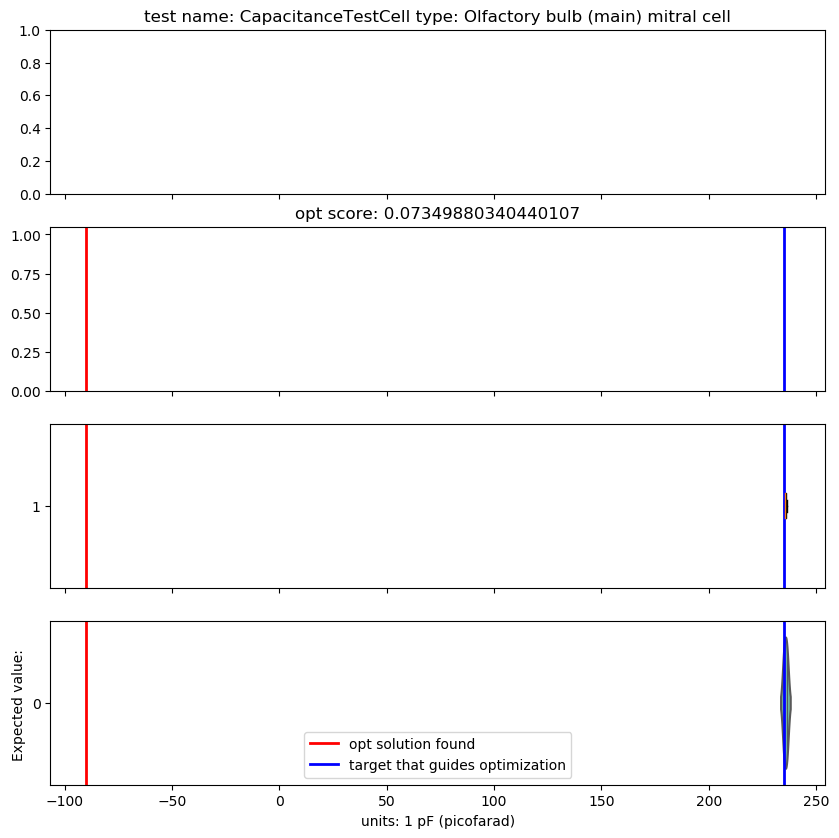

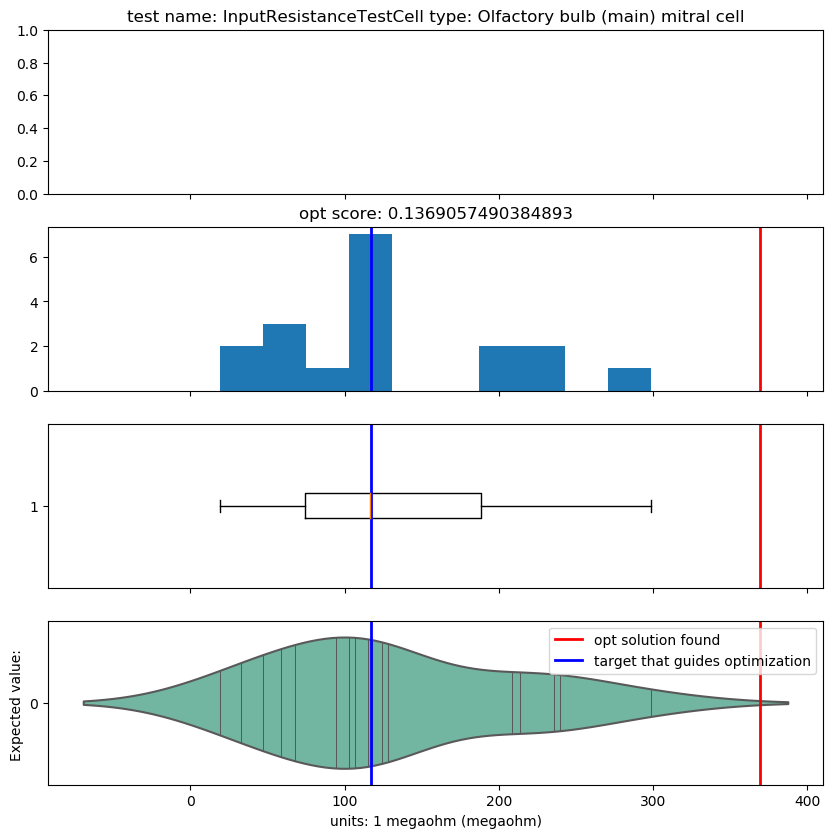

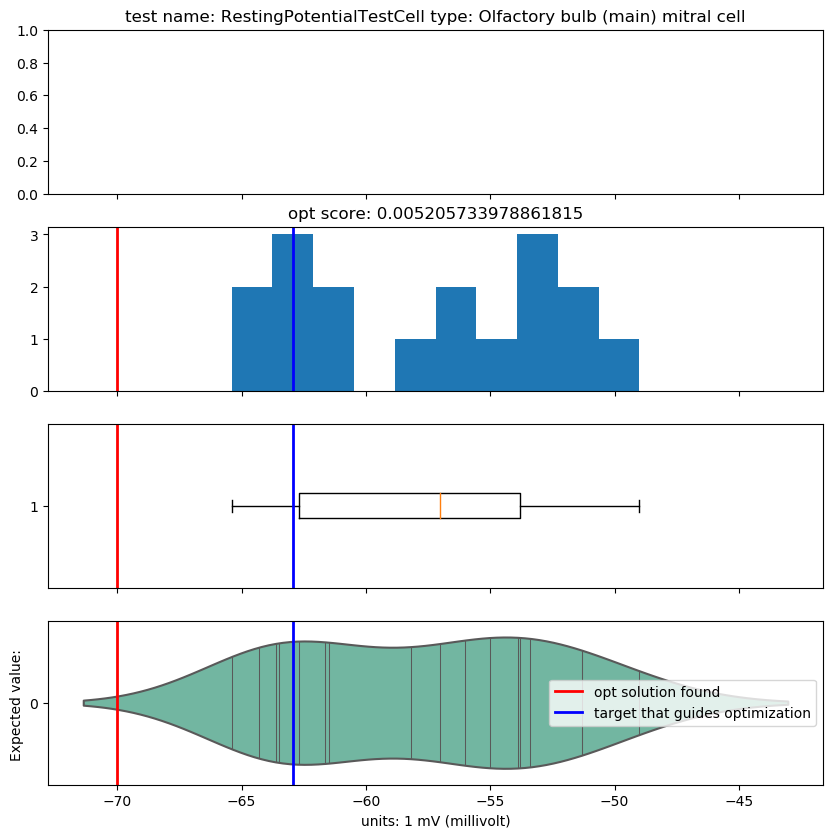

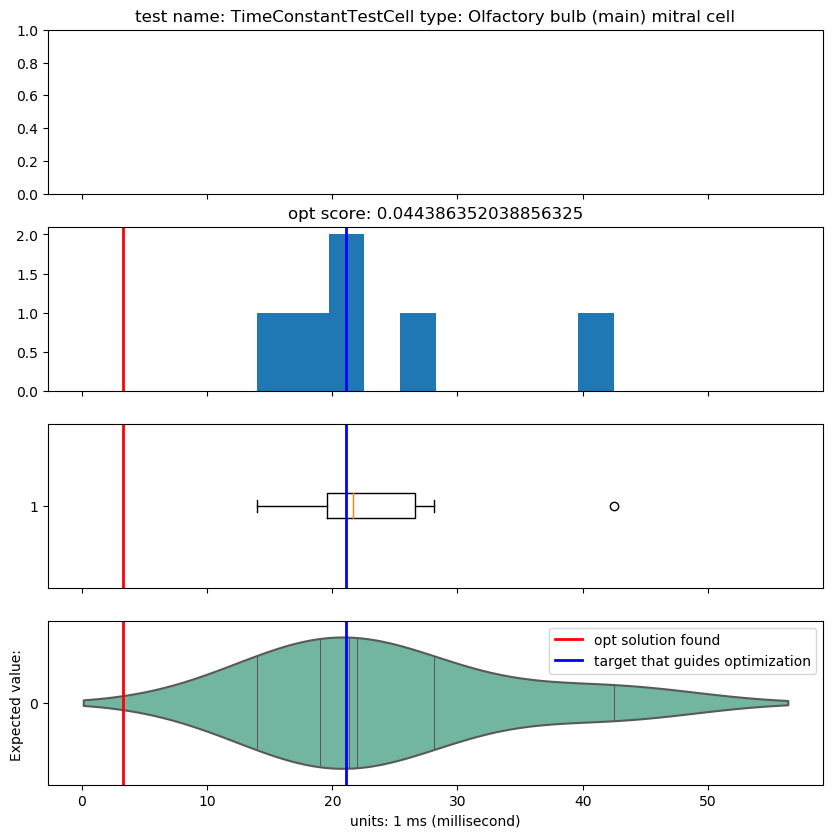

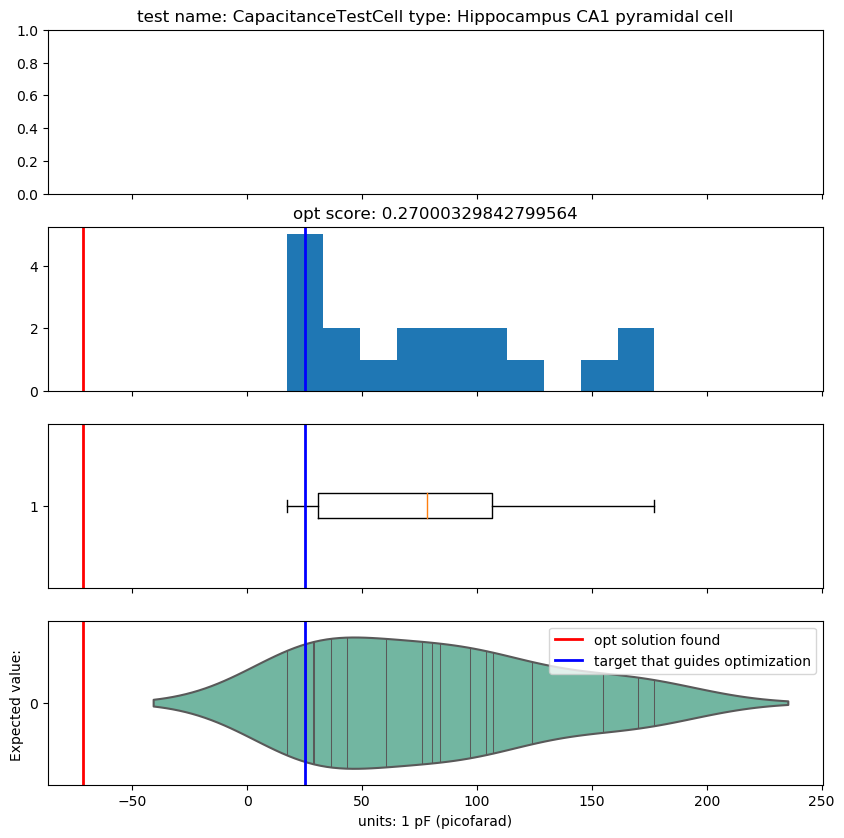

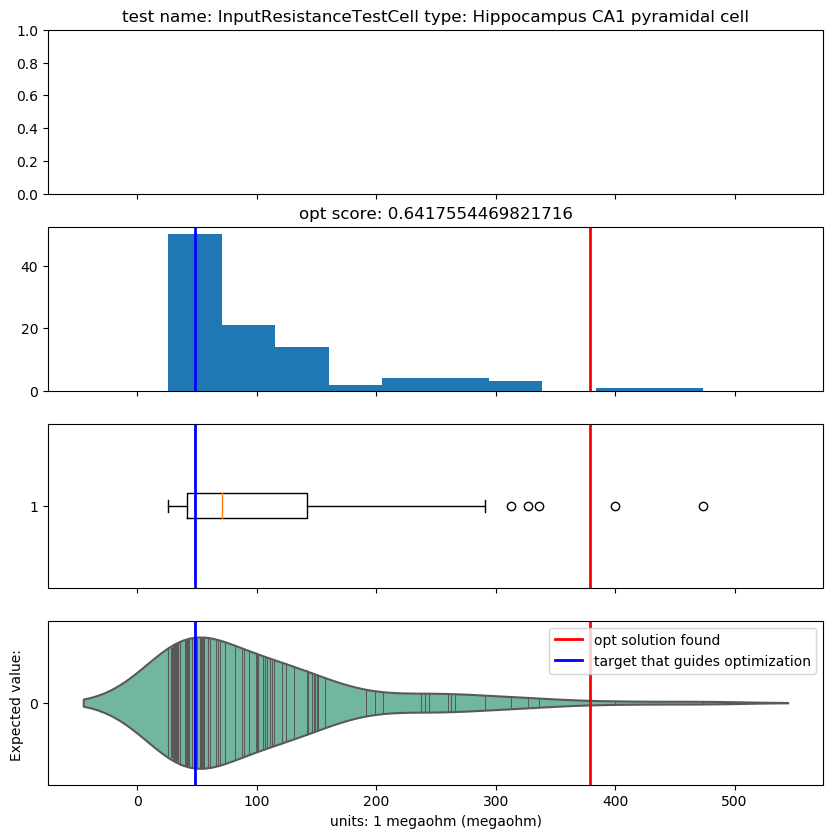

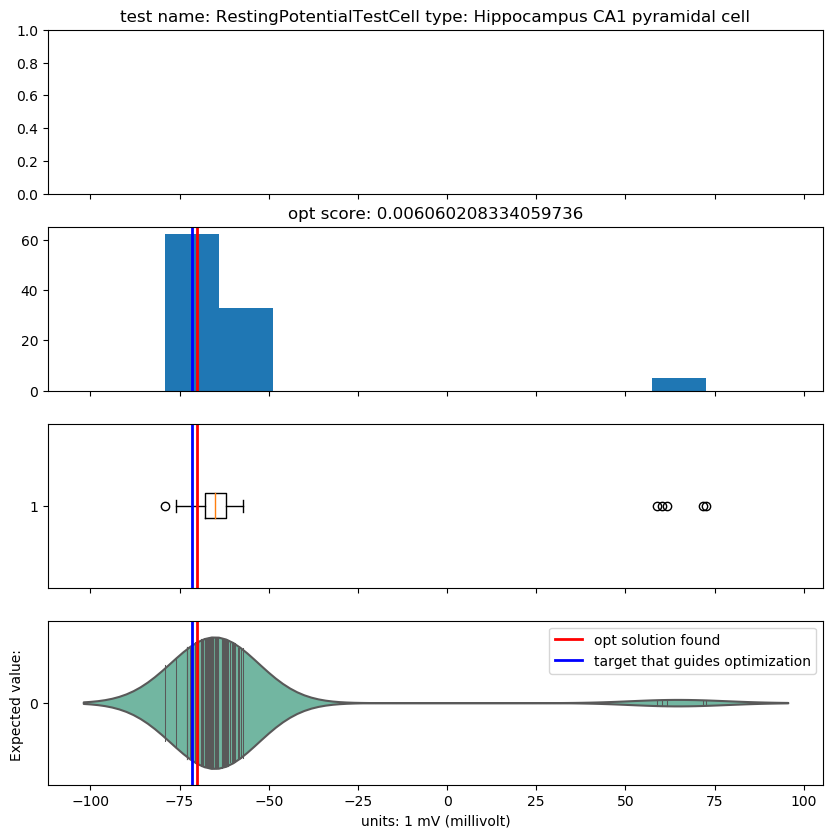

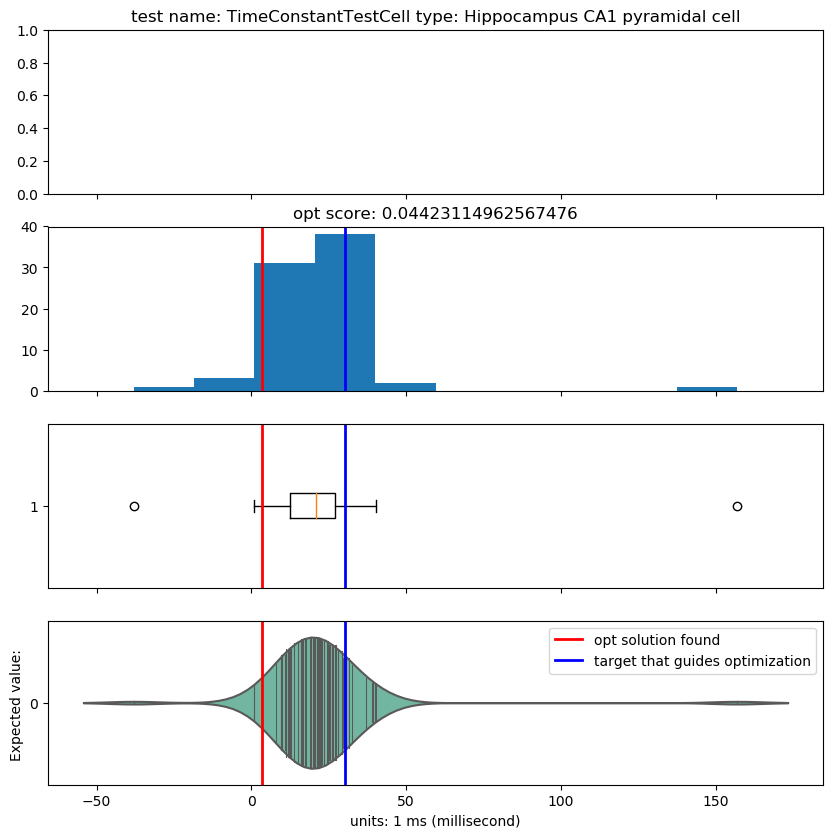

In [19]:
plot_opt_vs_distribution(neuron_values,inv_name_map,executable_tests,ADEXP_dtc)

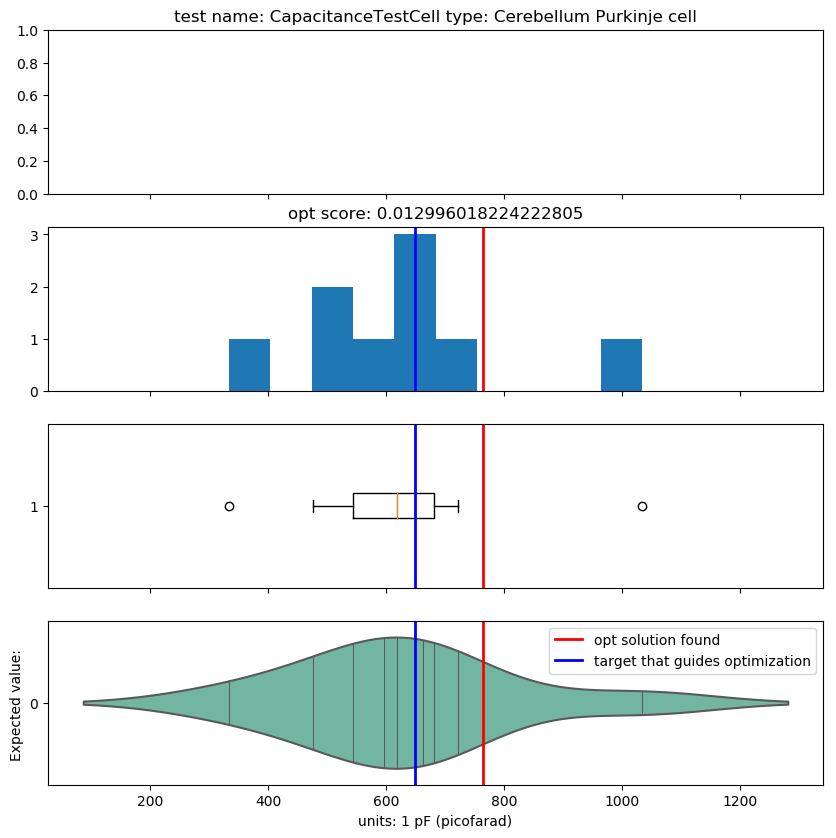

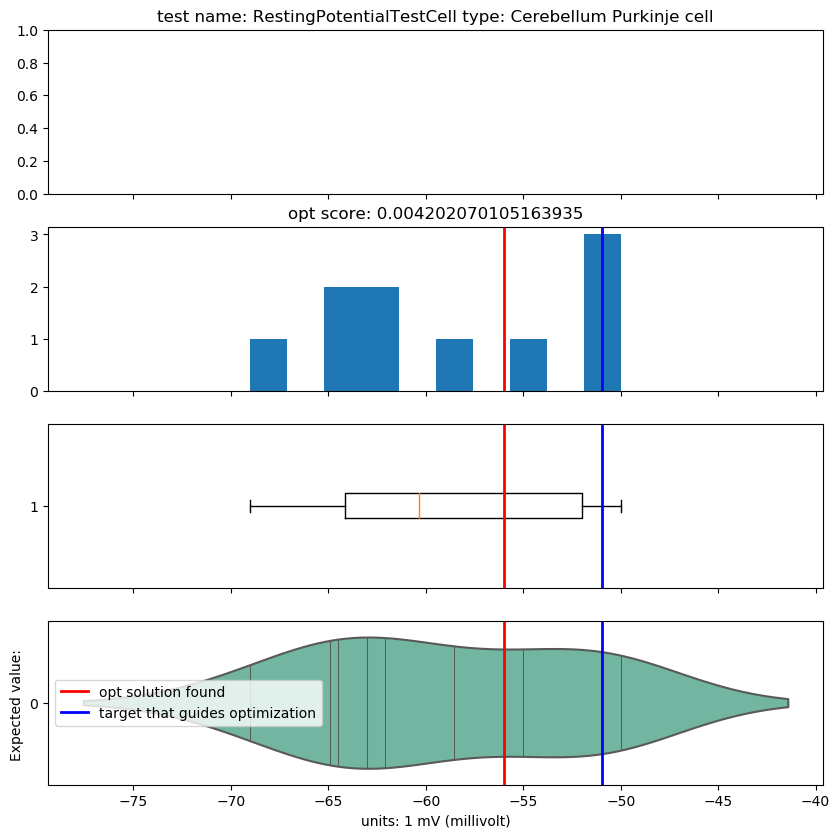

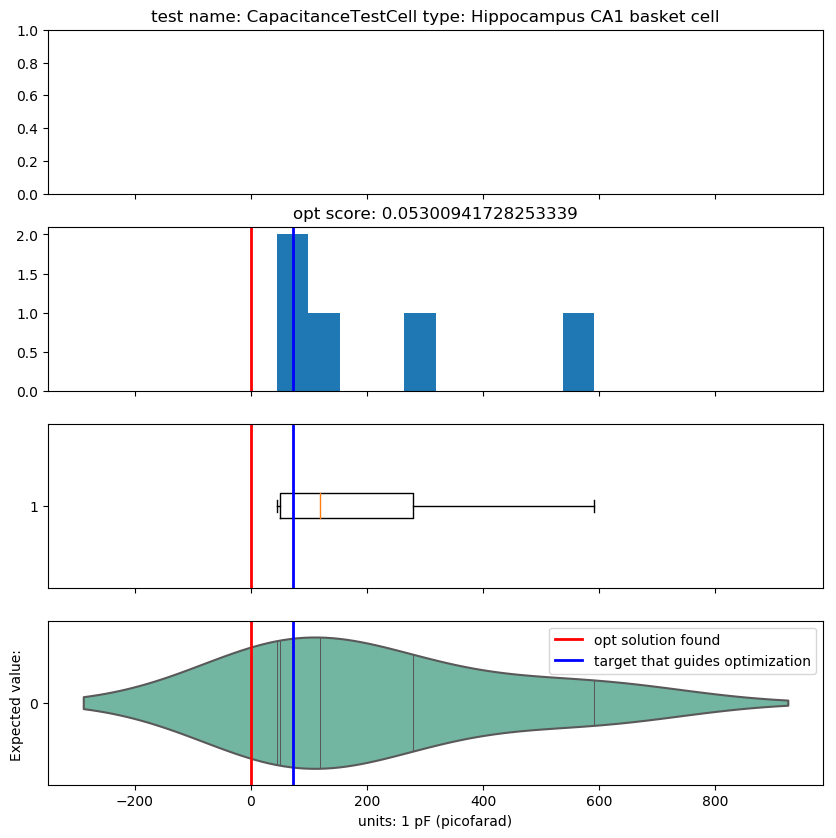

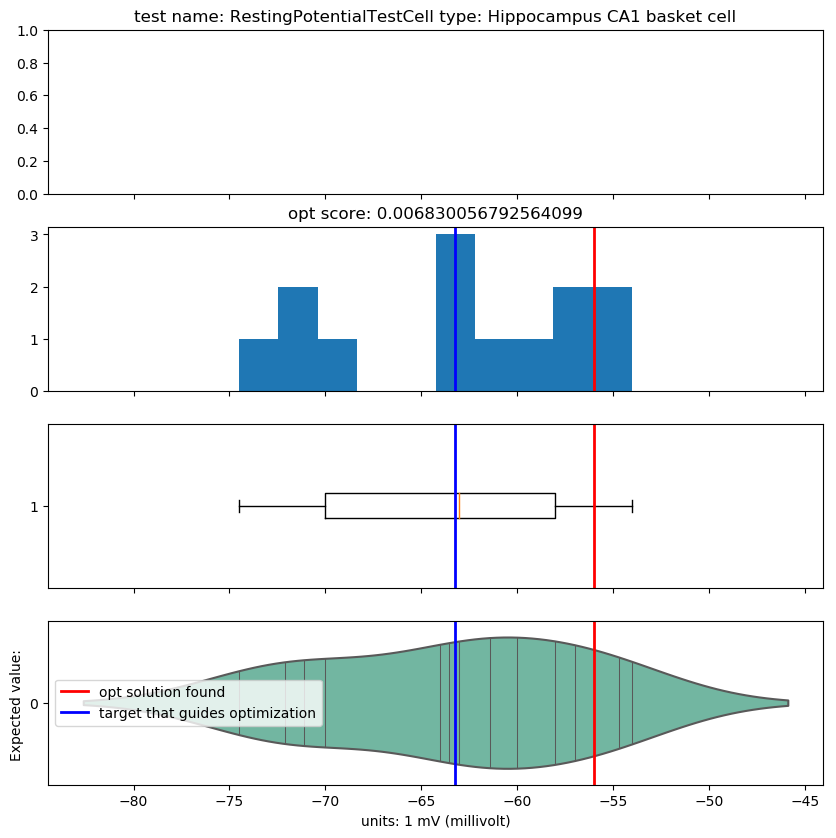

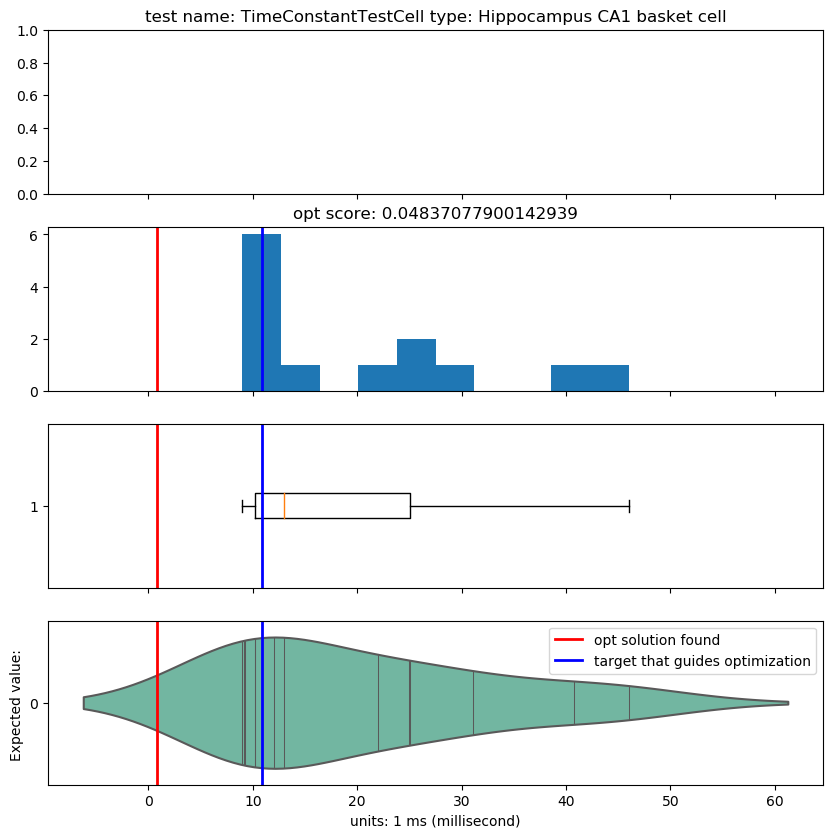

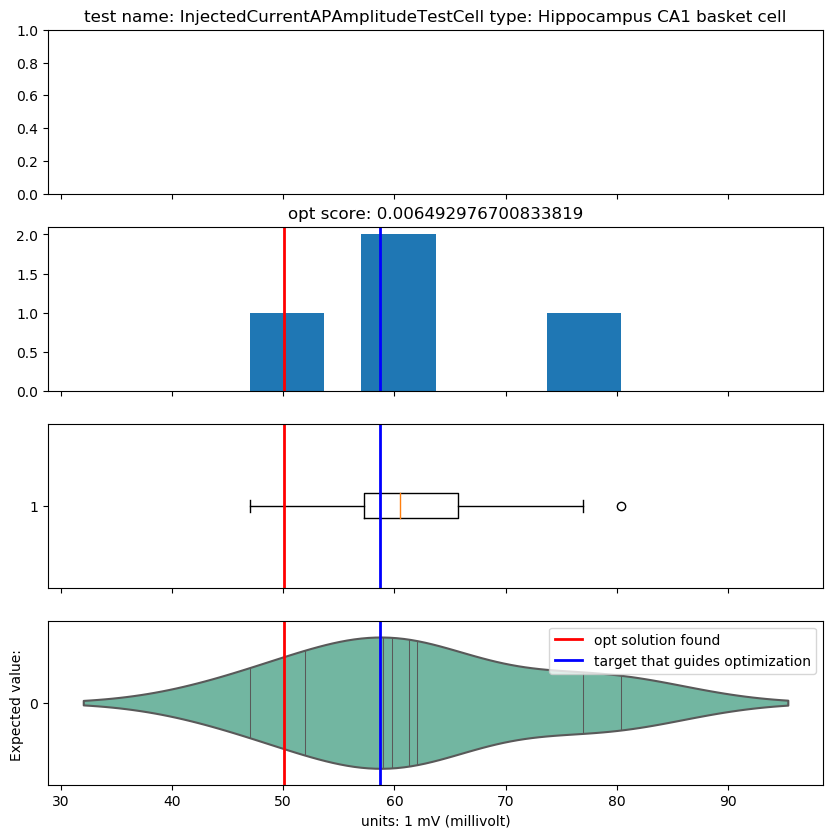

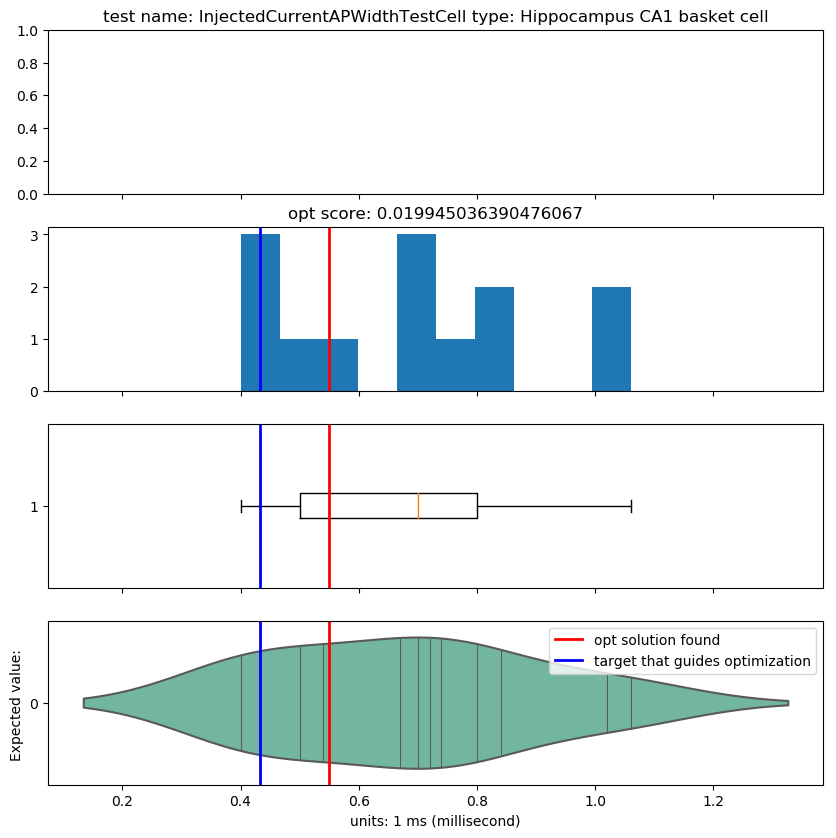

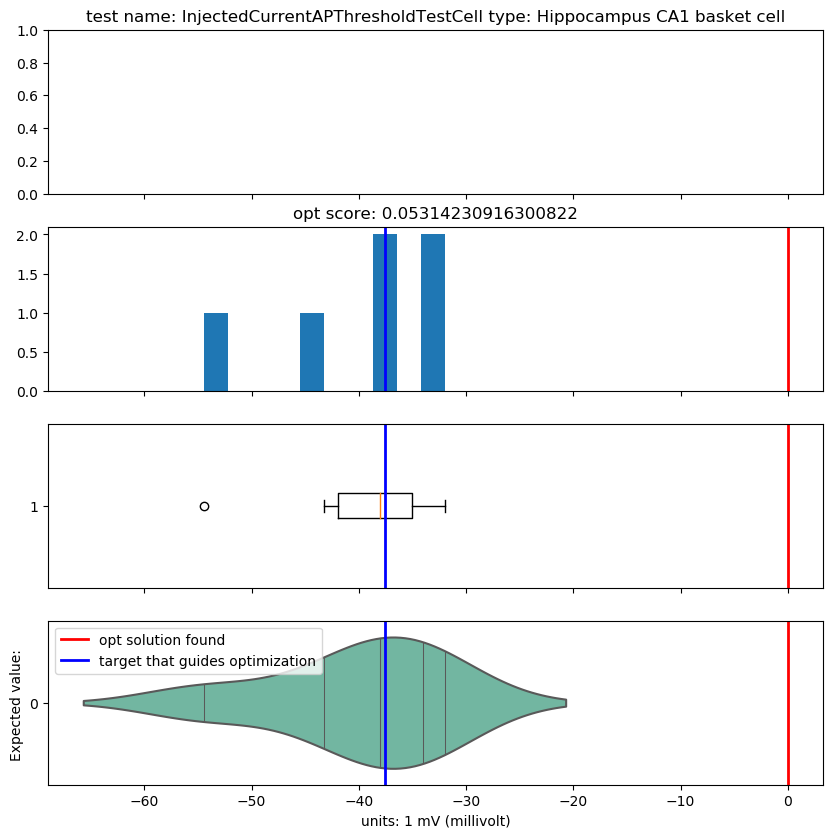

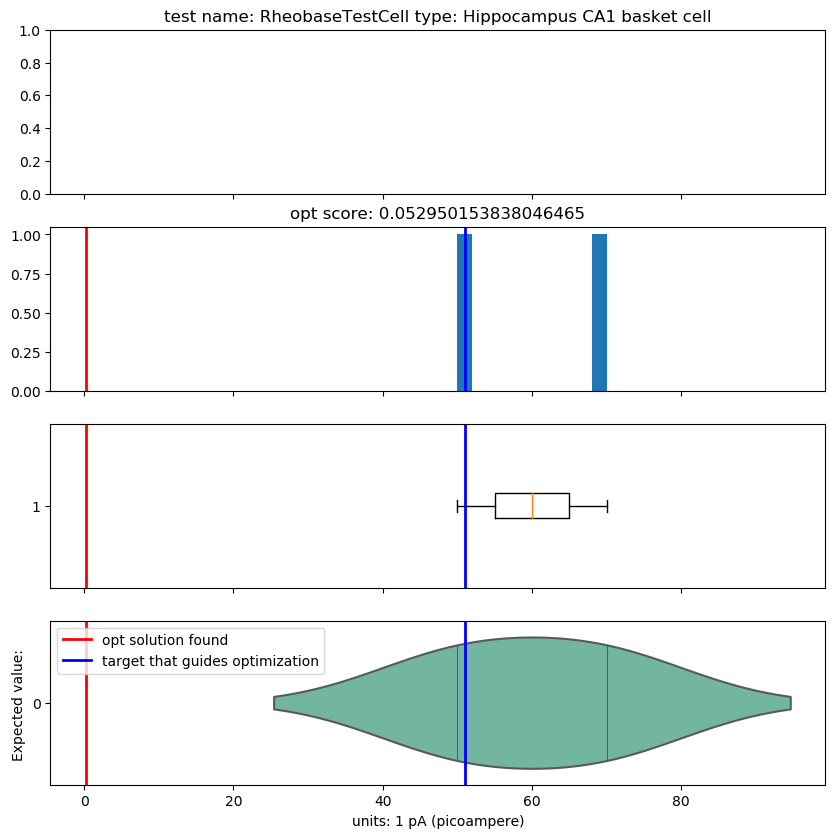

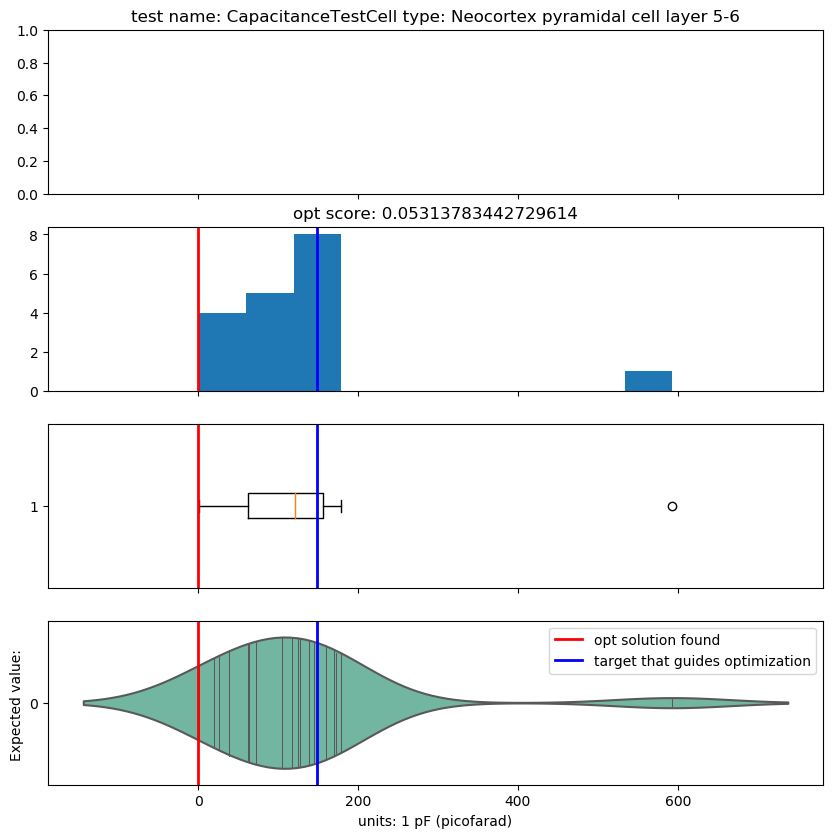

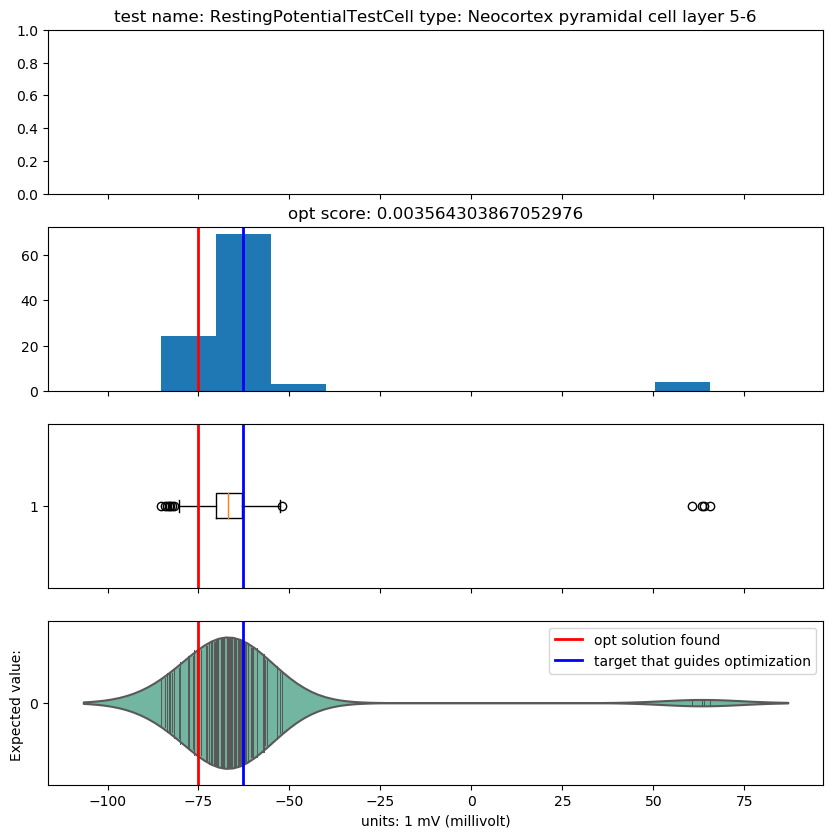

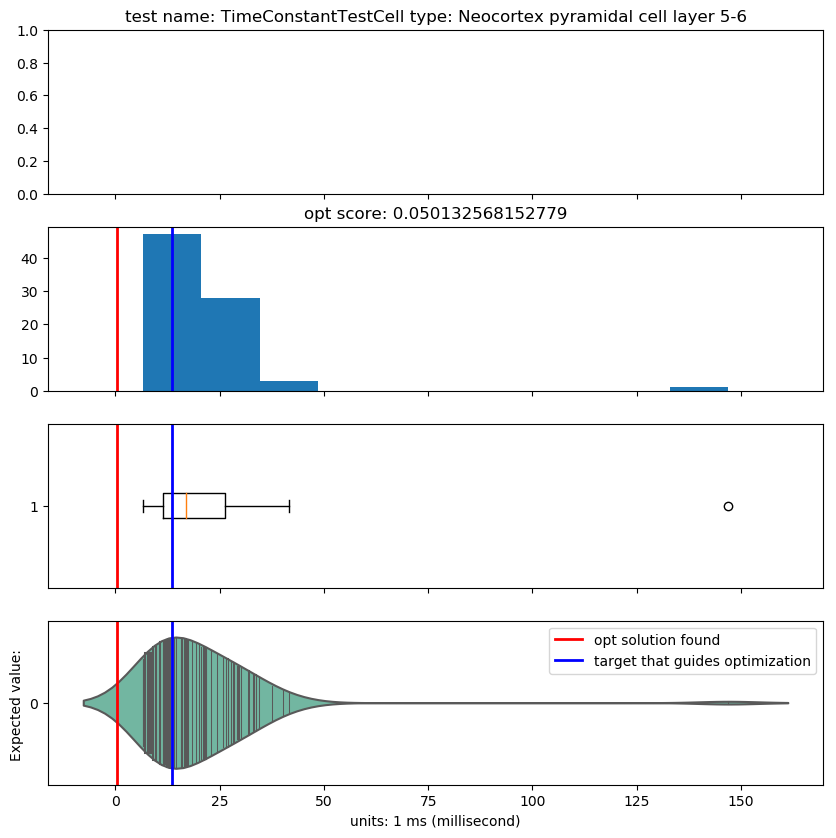

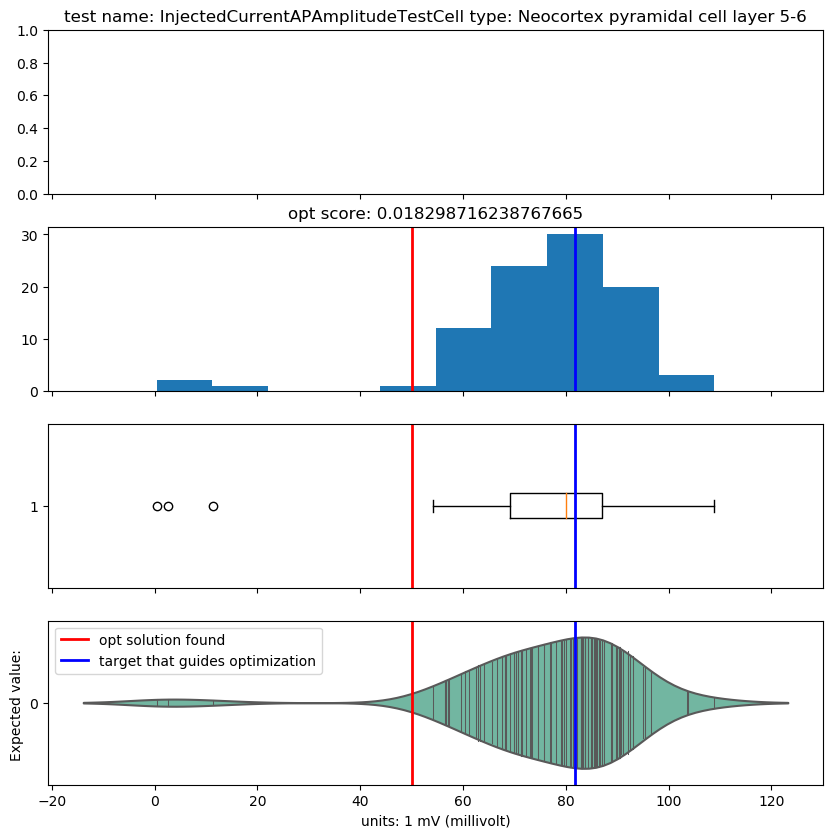

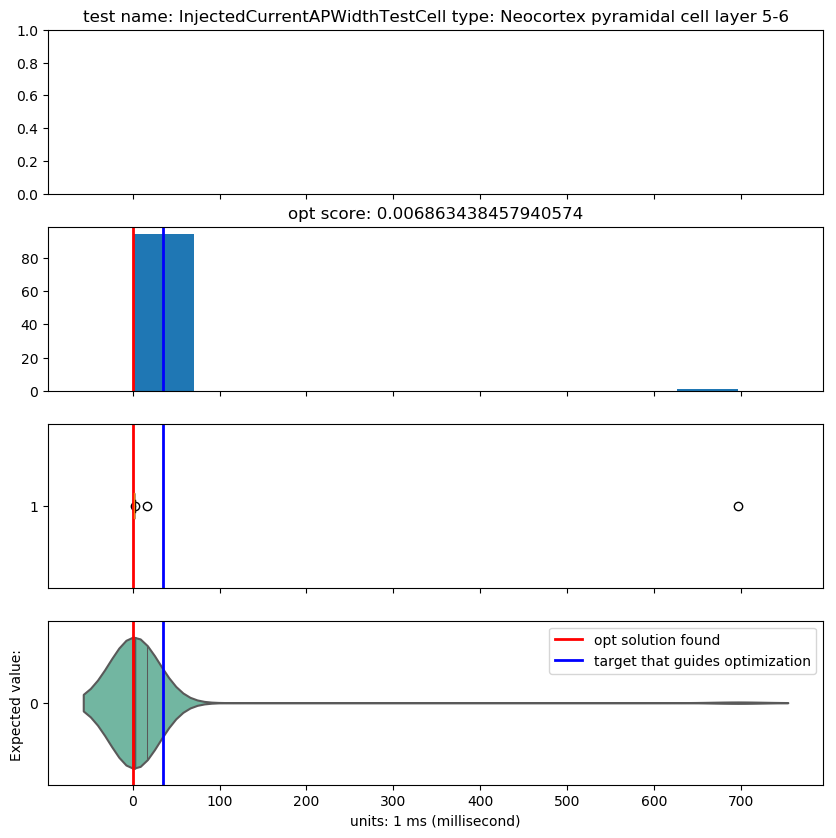

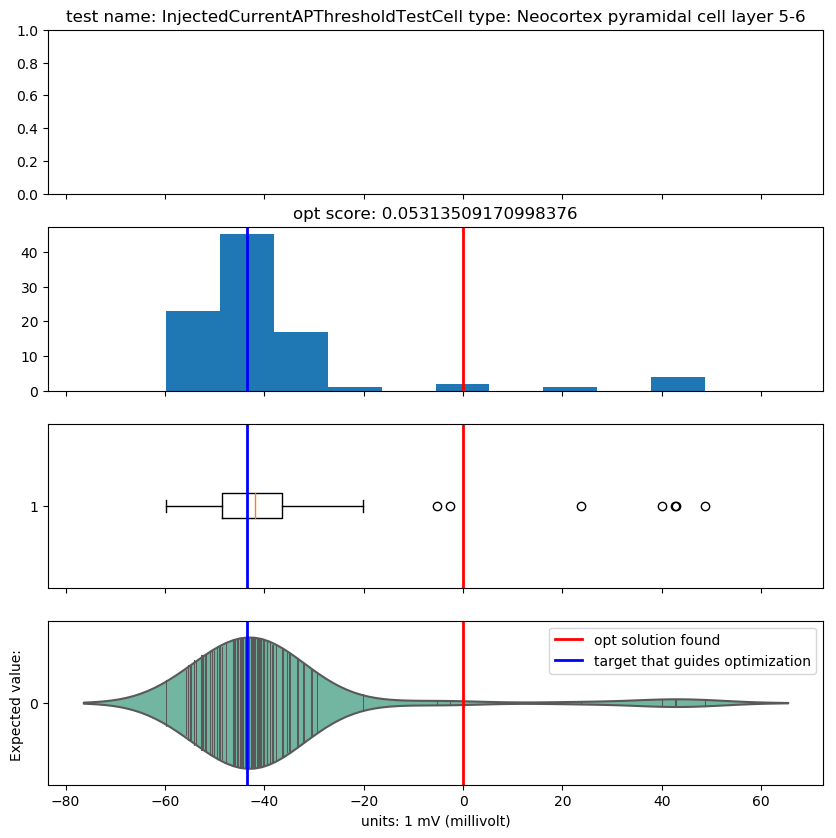

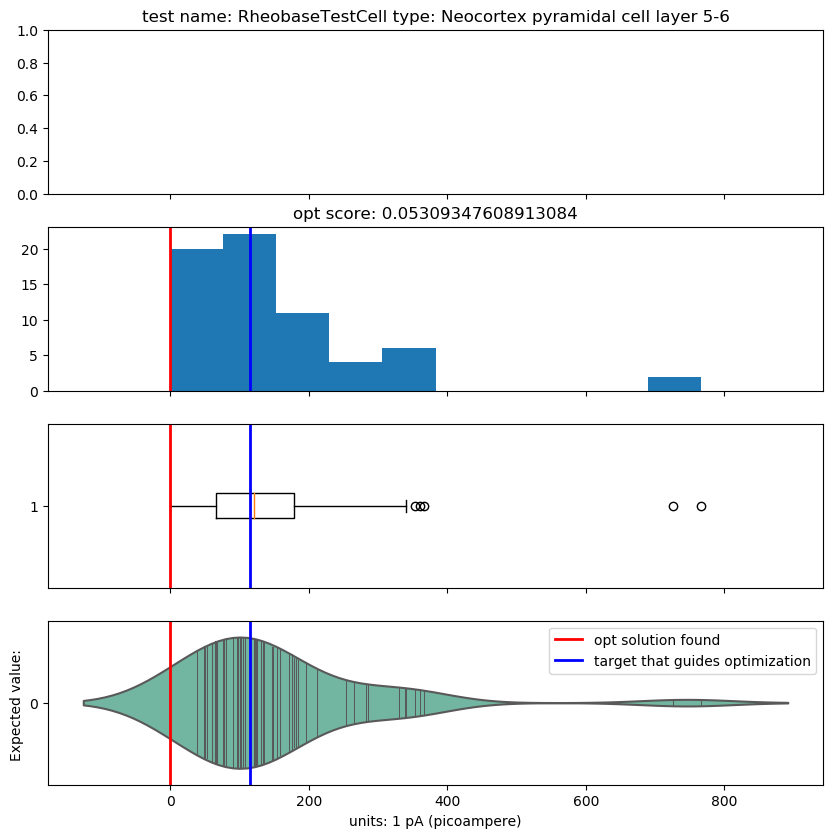

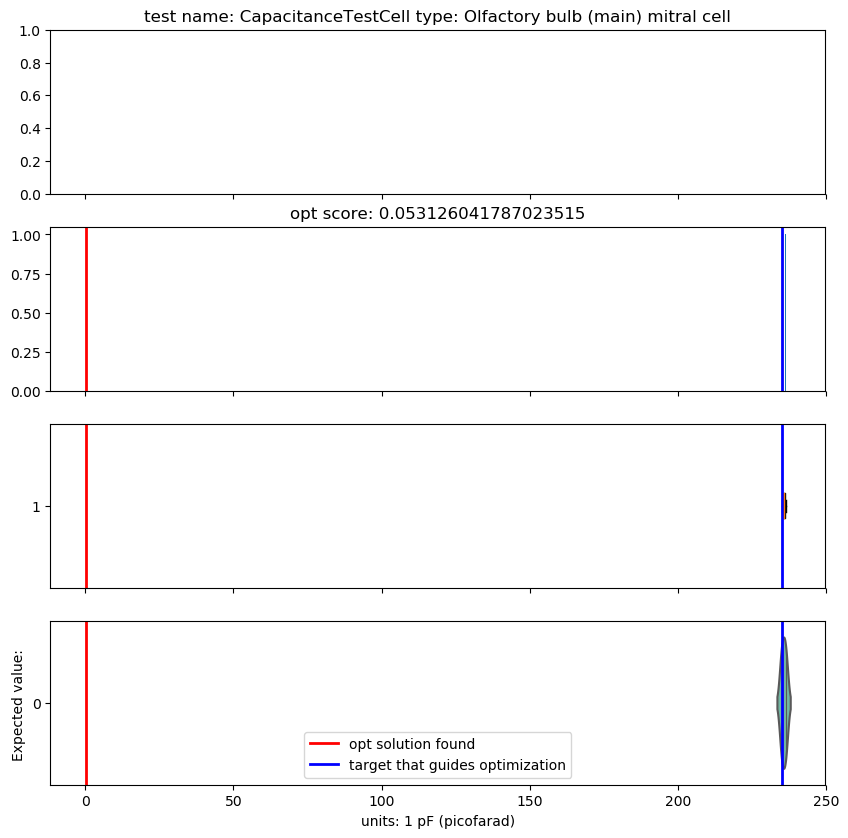

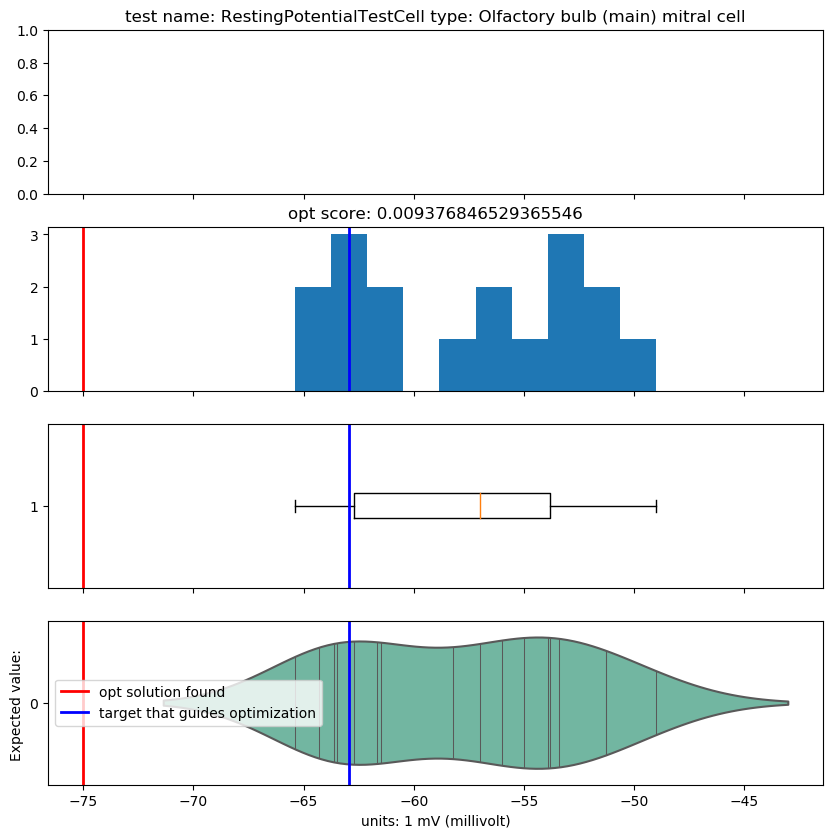

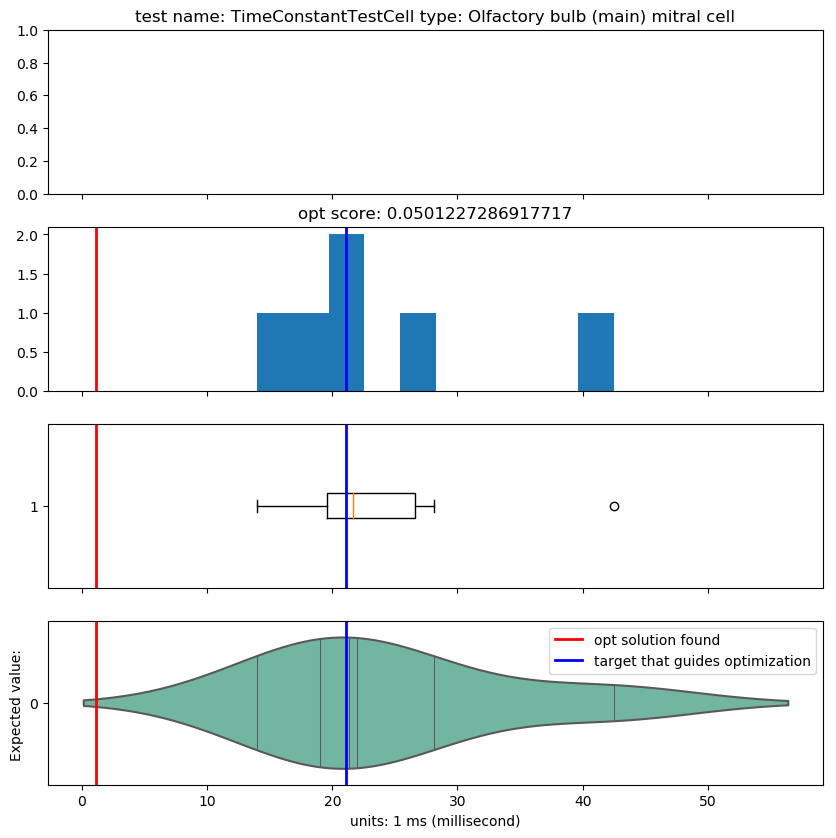

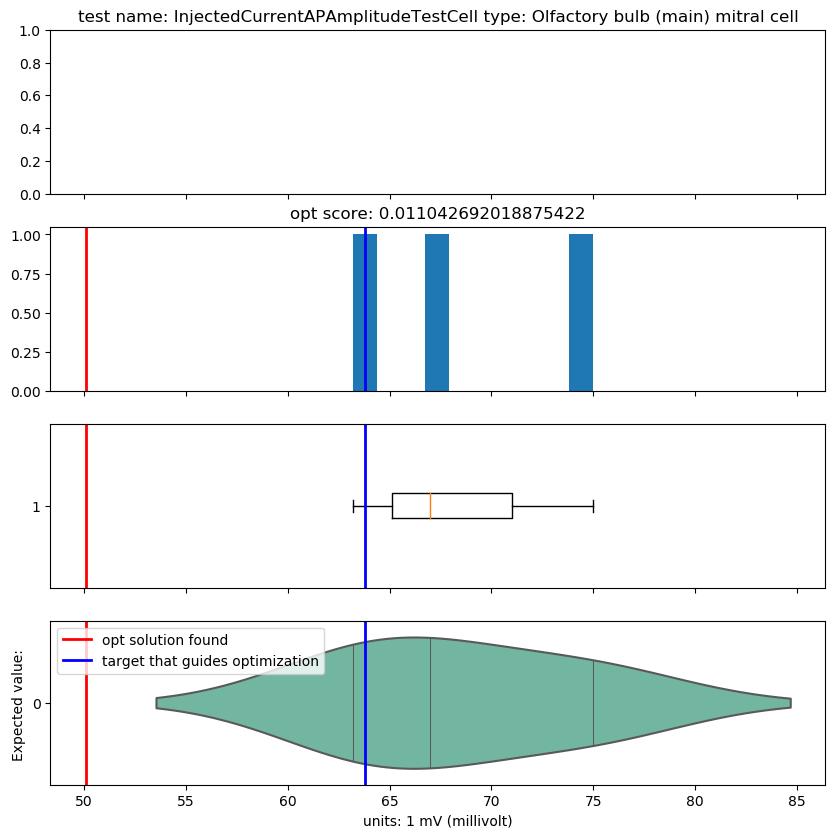

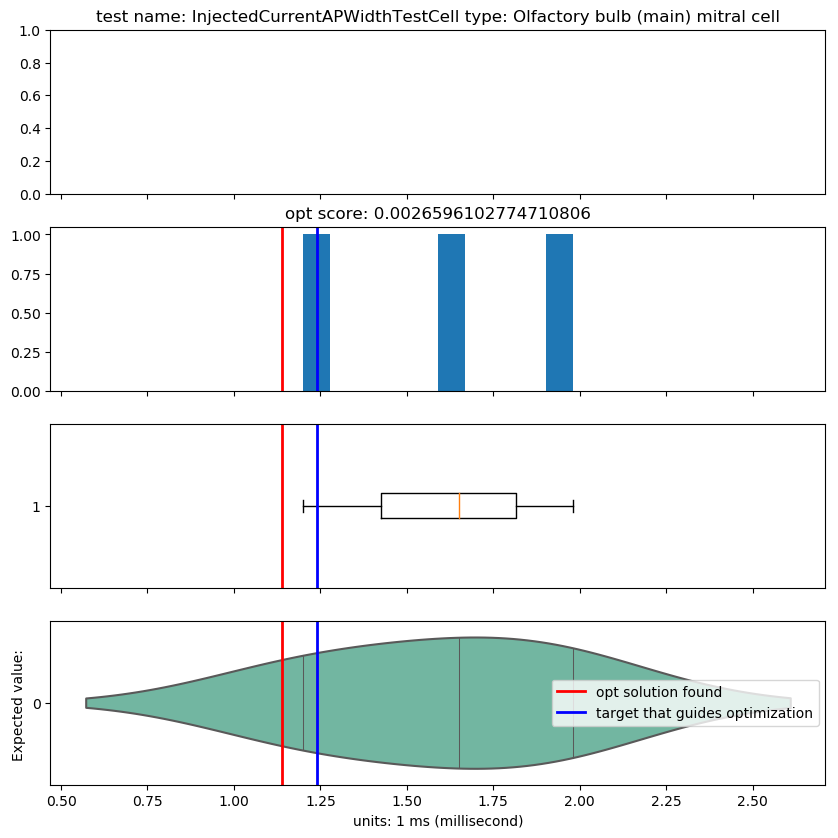

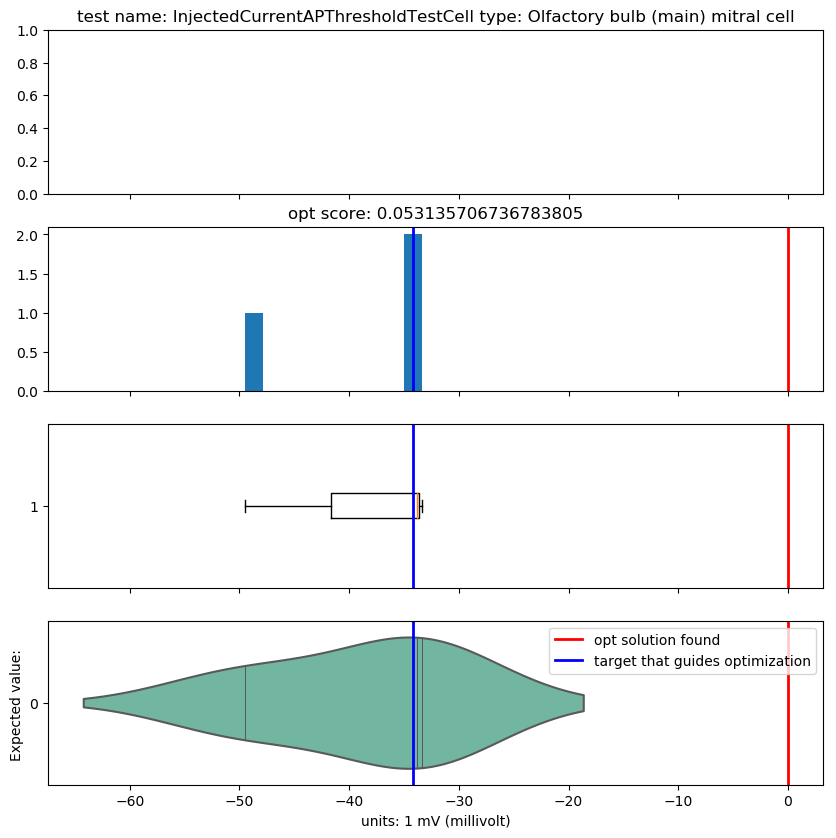

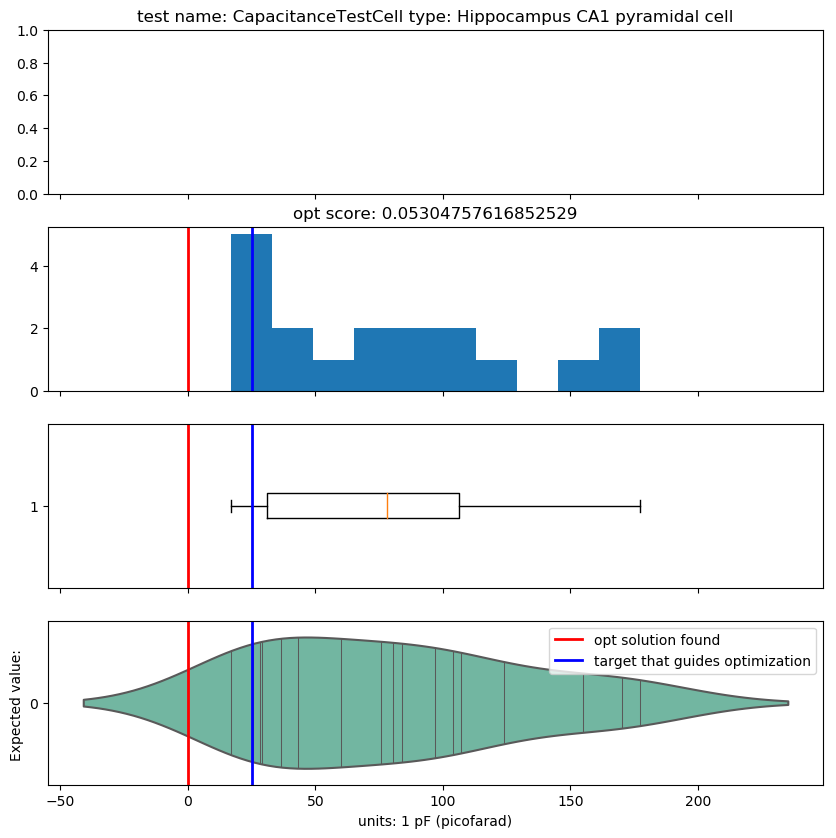

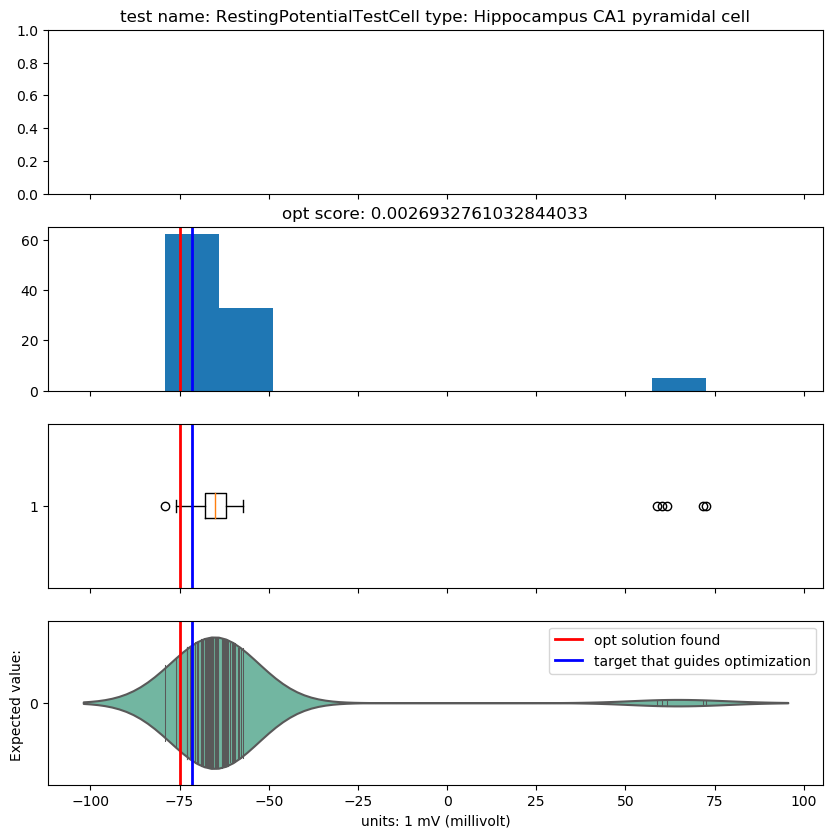

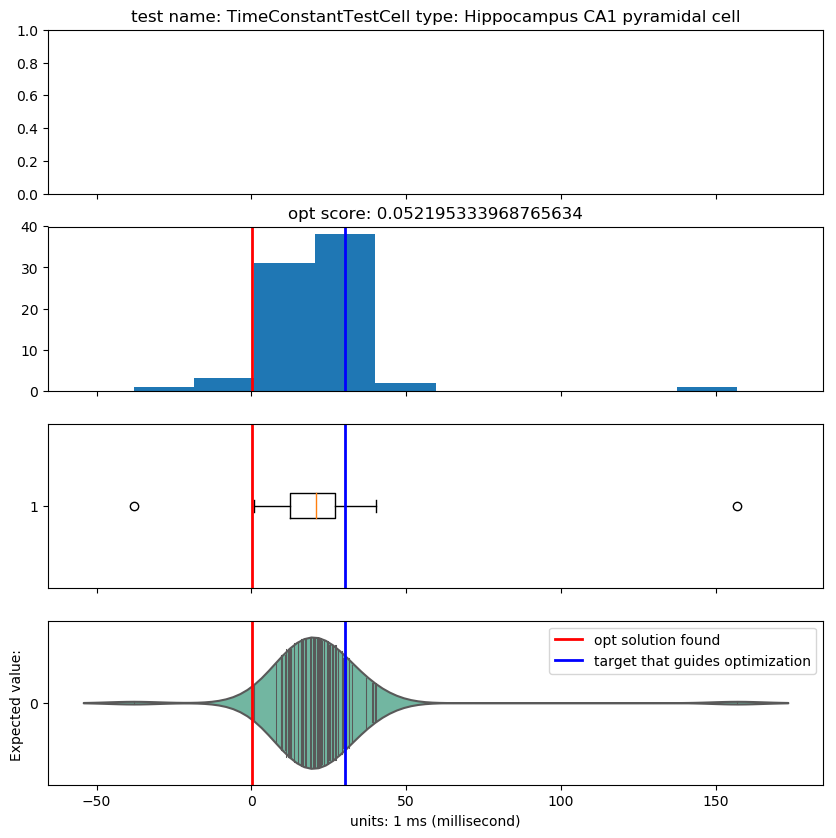

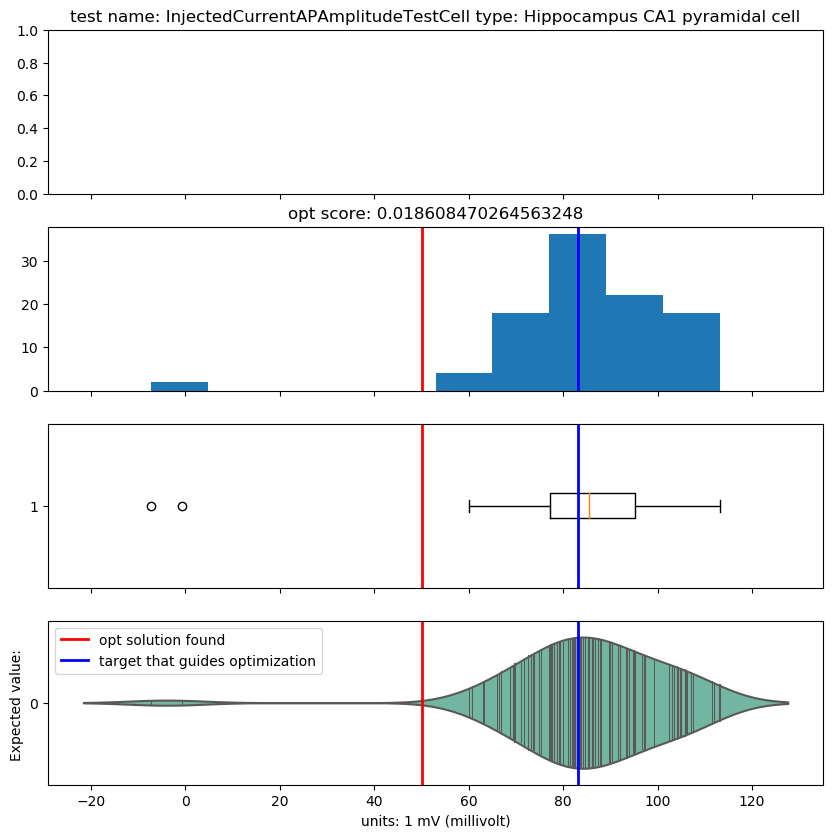

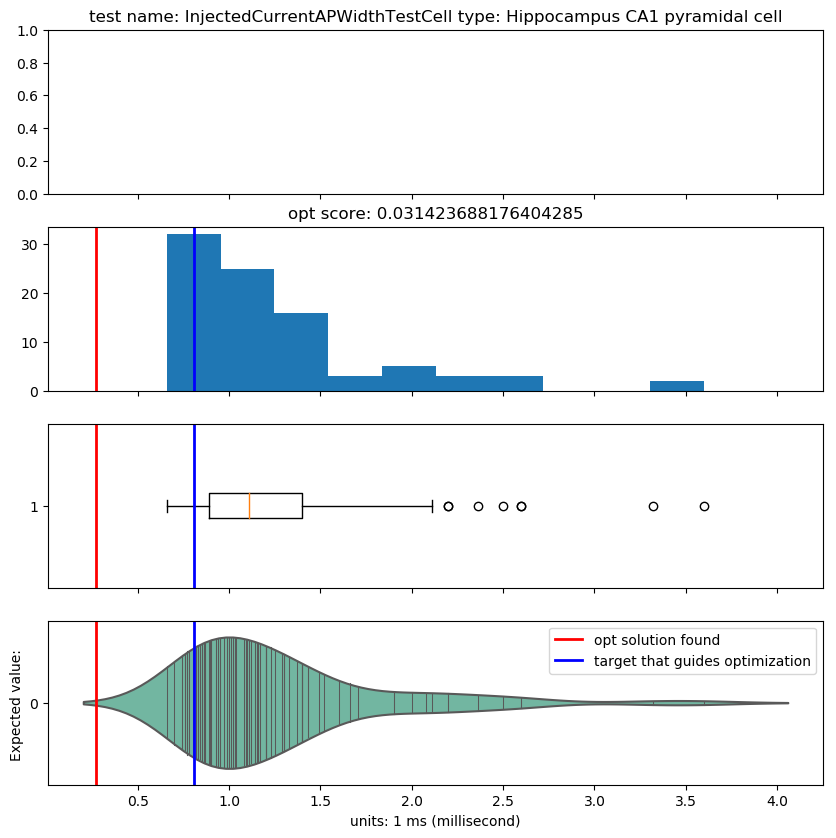

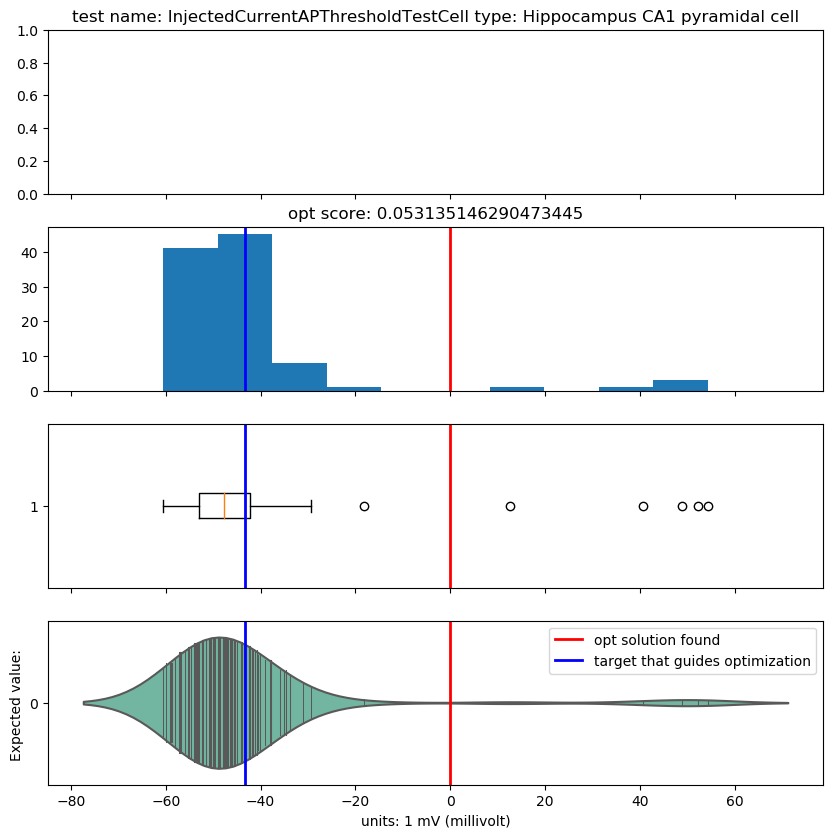

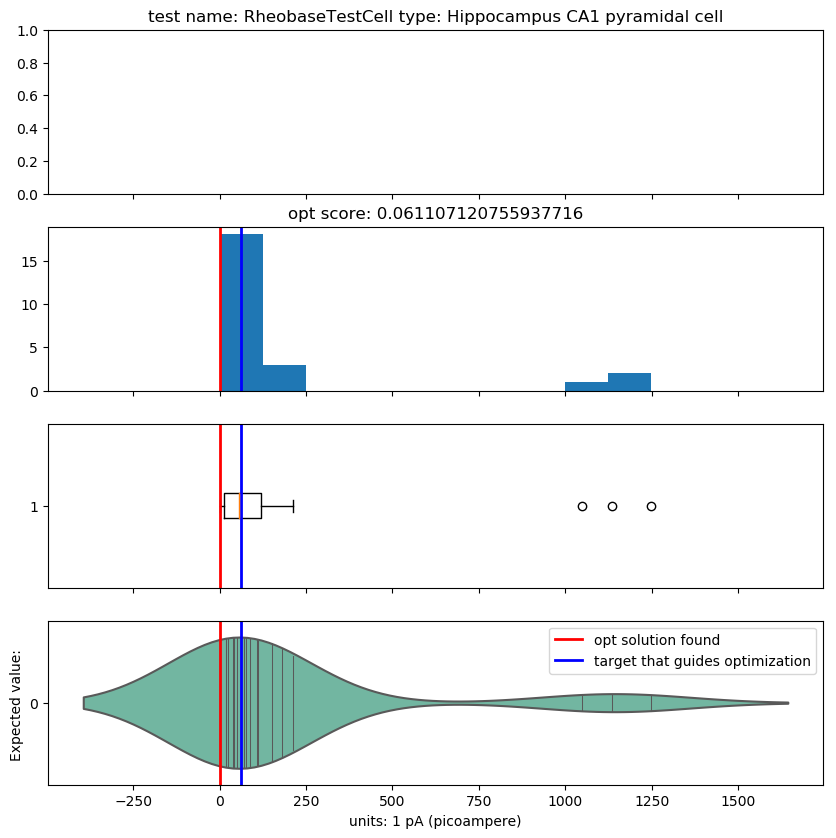

In [20]:
plot_opt_vs_distribution(neuron_values,inv_name_map,executable_tests,RAW_dtc)


{'id': 129, 'name': 'Olfactory bulb (main) mitral cell', 'neuron_db_id': 267, 'nlex_id': 'nlx_anat_100201'}
id {'definition': 'Neuron capacitance, typically measured by dividing membrane time constant by membrane resistance', 'id': 1, 'max_range': 10000.0, 'min_range': 1.0, 'name': 'cell capacitance', 'nlex_id': None, 'norm_criteria': 'Values corrected for differences in units, but are otherwise unchanged. Refer to individual articles for specific definitions and calculation methodologies.', 'plot_transform': 'log10', 'short_name': 'cap', 'units': {'id': 1, 'name': 'F', 'prefix': 'p'}}
worked
did not work
id {'definition': 'Input resistance measured at steady-state voltage response to current injection', 'id': 2, 'max_range': 20000.0, 'min_range': 5.0, 'name': 'input resistance', 'nlex_id': None, 'norm_criteria': 'Values corrected for differences in units, but are otherwise unchanged. Refer to individual articles for specific definitions and calculation methodologies.', 'plot_transform

ValueError: not enough values to unpack (expected 2, got 0)

In [22]:
conventional_mean_based_tests
ct = {i.name:i for i in conventional_mean_based_tests[1]}
result_RAW['ca1pyr']

from neuronunit.optimisation.optimization_management import WSListIndividual
genes = []
for i in result_RAW['ca1pyr']:
    
    gene = WSListIndividual(list(i.attrs.values()))
    genes.append(gene)
    #print(len(genes[-1]))
ct    

NameError: name 'conventional_mean_based_tests' is not defined

In [13]:
#%%capture
from neuronunit.optimisation.optimisations import run_ga
from neuronunit.optimisation import model_parameters
from neuronunit.optimisation.optimization_management import TSD

test = TSD(ct)
test.use_rheobase_score = True
backend = str("RAW")
MODEL_PARAMS=model_parameters.MODEL_PARAMS['RAW']

out = run_ga(MODEL_PARAMS, 1, test, \
        free_params = MODEL_PARAMS.keys(), hc = None, MU = len(genes),
           seed_pop = genes, \
           backend = backend, protocol={'use_rheobase_score':True,'allen':False,'elephant':True})

filtered_tests.keys()
out

NameError: name 'ct' is not defined